In [1]:
import pandas as pd
import numpy as np
import time
import pickle as pkl
# import category_encoders as ce
import warnings
warnings.filterwarnings('ignore')
from google.colab import drive
drive.mount('/content/gdrive/')
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import tqdm
from tqdm import tqdm, trange
from pprint import pprint

Mounted at /content/gdrive/


## Global Definitions:

In [2]:
delay_flag = 'DEP_DEL15'
# delay_flag = 'is delayed'
delay_threshold = 15
NEW_REGR_TARGET = 'DEP_ADDED_DELAY'
OLD_REGR_TARGET = 'DEP_DELAY_NEW'

In [3]:
file_path = '/content/gdrive/My Drive/CIS 5200 Final Project/merged_dataset/full_dataset_added_delay_20251202-033753.pkl'
# file_path = '/content/gdrive/My Drive/CIS 5200 Final Project/merged_dataset/full_dataset_new.pkl'

with open(file_path, 'rb') as f:
    df = pkl.load(f)

# file_path = '/content/gdrive/My Drive/CIS 5200 Final Project/merged_dataset/full_dataset_20251201-214451.csv'
# df = pd.read_csv(file_path)

# Preprocess Data - ONLY FOR DATASETS BEFORE DEC 1 10:37 Creation

## Drop negative delays and "mislabeled" data
mislabeled data == data that has DEP_DEL15 = 1 but DEP_DELAY_NEW < 15 (there aren't any of the opposite, where DEP_DEL15 == 0 and DEP_DELAY_NEW >= 15)



In [ ]:
# df.loc[df['DEP_DELAY_NEW'] < 0].index

In [ ]:
df.describe()

,DEP_TIME,DEP_DELAY_NEW,DEP_DEL15,DISTANCE,DISTANCE_GROUP,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,...,WT10,WT11,AWND_missing,TMIN_missing,TMAX_missing,IS_HEAVY_RAIN,IS_SNOWY,IS_FREEZING,IS_EXTREME_HEAT,SEASON
count,6.489062e+06,6.489062e+06,6.489062e+06,6.489062e+06,6.489062e+06,1.246999e+06,1.246999e+06,1.246999e+06,1.246999e+06,1.246999e+06,...,6.489062e+06,6.489062e+06,6.489062e+06,6.489062e+06,6.489062e+06,6.489062e+06,6.489062e+06,6.489062e+06,6.489062e+06,6.489062e+06
mean,1.350487e+03,7.111874e+00,1.891441e-01,-2.767354e+00,3.821102e+00,2.063721e+01,3.514959e+00,1.649660e+01,9.512277e-02,2.665774e+01,...,1.191235e-04,1.587286e-05,1.148086e-04,2.476475e-04,1.998748e-04,2.078650e-01,2.069883e-02,1.273341e-01,5.227135e-02,1.532520e+00
std,5.084784e+02,2.454840e+01,3.916231e-01,7.472465e+01,2.382233e+00,6.221202e+01,3.032180e+01,3.880711e+01,3.427895e+00,5.182926e+01,...,1.091372e-02,3.984045e-03,1.071426e-02,1.573487e-02,1.413630e-02,4.057797e-01,1.423741e-01,3.333469e-01,2.225737e-01,1.101442e+00
min,1.000000e+00,-1.280000e+02,0.000000e+00,-1.280000e+02,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,9.240000e+02,0.000000e+00,0.000000e+00,-7.000000e+01,2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
50%,1.337000e+03,0.000000e+00,0.000000e+00,-6.000000e+00,3.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00,2.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00
75%,1.757000e+03,5.000000e+00,0.000000e+00,6.700000e+01,5.000000e+00,1.800000e+01,0.000000e+00,2.000000e+01,0.000000e+00,3.300000e+01,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.000000e+00
max,2.400000e+03,1.270000e+02,1.000000e+00,1.270000e+02,1.100000e+01,2.695000e+03,1.575000e+03,1.711000e+03,1.078000e+03,2.010000e+03,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,3.000000e+00


In [ ]:
df['ROUTE_NAME'].value_counts()

,count
ROUTE_NAME,
Chicago O'Hare International - LaGuardia,14219
LaGuardia - Chicago O'Hare International,14203
Los Angeles International - San Francisco International,14096
San Francisco International - Los Angeles International,14088
Los Angeles International - John F. Kennedy International,12797
...,...
San Diego International Lindbergh Fl - Pittsburgh International,1
Truax Field - Cincinnati/Northern Kentucky International,1
Truax Field - Seattle International,1


In [ ]:
# drop negative delays; somehow early departures?
df.drop(df.loc[df['DEP_DELAY_NEW'] < 0].index, axis=0, inplace=True)

In [ ]:
df['delay_mismatch'] = (df['DEP_DELAY_NEW'] >= 15) != (df['DEP_DEL15'])
print(df['delay_mismatch'].value_counts())

delay_mismatch
False    6357979
True        5222
Name: count, dtype: int64


In [ ]:
df.loc[df['delay_mismatch'] == True].head(5)

,MONTH,DAY_OF_WEEK,DEP_TIME,DEP_DELAY_NEW,DEP_DEL15,DEP_TIME_BLK,DISTANCE,DISTANCE_GROUP,CARRIER_DELAY,WEATHER_DELAY,...,WT11,AWND_missing,TMIN_missing,TMAX_missing,IS_HEAVY_RAIN,IS_SNOWY,IS_FREEZING,IS_EXTREME_HEAT,SEASON,delay_mismatch
3556,1,1,956.0,9,1,2000-2059,-69,1,0.0,775.0,...,0.0,0,0,0,0,0,1,0,0,True
5202,1,4,1428.0,12,1,1000-1059,-106,10,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0,True
9154,1,5,1116.0,0,1,0700-0759,-81,2,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0,True
10028,1,4,9.0,8,1,1900-1959,32,2,0.0,0.0,...,0.0,0,0,0,1,1,1,0,0,True
13196,1,1,1504.0,13,1,1000-1059,-64,8,253.0,0.0,...,0.0,0,0,0,0,0,0,0,0,True


In [ ]:
# get rows where delay_mismatch is True but dep_del15 is 0
df.loc[(df['delay_mismatch'] == True) & (df['DEP_DEL15'] ==0)].head(5)

,MONTH,DAY_OF_WEEK,DEP_TIME,DEP_DELAY_NEW,DEP_DEL15,DEP_TIME_BLK,DISTANCE,DISTANCE_GROUP,CARRIER_DELAY,WEATHER_DELAY,...,WT11,AWND_missing,TMIN_missing,TMAX_missing,IS_HEAVY_RAIN,IS_SNOWY,IS_FREEZING,IS_EXTREME_HEAT,SEASON,delay_mismatch


In [ ]:
df.drop(df.loc[df['delay_mismatch'] == True].index, axis=0, inplace=True)

In [ ]:
df['delay_mismatch'].value_counts()

,count
delay_mismatch,
False,6357979


In [ ]:
df.drop(columns=['delay_mismatch'], inplace=True)

## Drop unwanted columns: distance, dep_del15

In [ ]:
## should probably drop the delay flags as well...?
df.drop(columns=['DISTANCE', 'LATITUDE', 'LONGITUDE', 'CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY',
       'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY'], inplace=True)

In [ ]:
df.columns

Index(['MONTH', 'DAY_OF_WEEK', 'DEP_TIME', 'DEP_DELAY_NEW', 'DEP_DEL15',
       'DEP_TIME_BLK', 'DISTANCE_GROUP', 'DEP_HOUR', 'SEGMENT_NUMBER',
       'CONCURRENT_FLIGHTS', 'NUMBER_OF_SEATS', 'CARRIER_NAME',
       'AIRPORT_FLIGHTS_MONTH', 'AIRLINE_FLIGHTS_MONTH',
       'AIRLINE_AIRPORT_FLIGHTS_MONTH', 'AVG_MONTHLY_PASS_AIRPORT',
       'AVG_MONTHLY_PASS_AIRLINE', 'FLT_ATTENDANTS_PER_PASS',
       'GROUND_SERV_PER_PASS', 'PLANE_AGE', 'DEPARTING_AIRPORT',
       'PREVIOUS_AIRPORT', 'DESTINATION_AIRPORT', 'ROUTE_NAME',
       'INCOMING_ROUTE', 'CARRIER_AIRPORT', 'PRCP', 'SNOW', 'SNWD', 'TMAX',
       'TMIN', 'AWND', 'WT01', 'WT02', 'WT03', 'WT04', 'WT05', 'WT06', 'WT07',
       'WT08', 'WT09', 'WT10', 'WT11', 'AWND_missing', 'TMIN_missing',
       'TMAX_missing', 'IS_HEAVY_RAIN', 'IS_SNOWY', 'IS_FREEZING',
       'IS_EXTREME_HEAT', 'SEASON'],
      dtype='object')

# Some EDA to check for Feature Engineering


In [ ]:
df.describe()

,DEP_TIME,DEP_DELAY_NEW,DEP_DEL15,DISTANCE_GROUP,DEP_HOUR,SEGMENT_NUMBER,CONCURRENT_FLIGHTS,NUMBER_OF_SEATS,AIRPORT_FLIGHTS_MONTH,AIRLINE_FLIGHTS_MONTH,...,WT11,AWND_missing,TMIN_missing,TMAX_missing,IS_HEAVY_RAIN,IS_SNOWY,IS_FREEZING,IS_EXTREME_HEAT,SEASON,DEP_ADDED_DELAY
count,6.357979e+06,6.357979e+06,6.357979e+06,6.357979e+06,6.357979e+06,6.357979e+06,6.357979e+06,6.357979e+06,6.357979e+06,6.357979e+06,...,6.357979e+06,6.357979e+06,6.357979e+06,6.357979e+06,6.357979e+06,6.357979e+06,6.357979e+06,6.357979e+06,6.357979e+06,6.357979e+06
mean,1.345092e+03,8.887840e+00,1.724266e-01,3.819894e+00,1.314352e+01,3.042002e+00,2.785596e+01,1.338365e+02,1.268212e+04,6.310914e+04,...,1.588555e-05,1.053794e-04,2.485066e-04,1.989626e-04,2.046760e-01,2.011897e-02,1.271156e-01,5.235595e-02,1.534470e+00,5.467189e+00
std,5.047983e+02,2.071588e+01,3.777509e-01,2.382010e+00,5.057576e+00,1.755591e+00,2.153442e+01,4.639625e+01,8.845879e+03,3.440394e+04,...,3.985637e-03,1.026491e-02,1.576214e-02,1.410401e-02,4.034647e-01,1.404073e-01,3.331024e-01,2.227438e-01,1.102870e+00,1.681399e+01
min,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,4.400000e+01,1.100000e+03,5.582000e+03,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,9.210000e+02,0.000000e+00,0.000000e+00,2.000000e+00,9.000000e+00,2.000000e+00,1.100000e+01,9.000000e+01,5.337000e+03,2.503400e+04,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00
50%,1.332000e+03,0.000000e+00,0.000000e+00,3.000000e+00,1.300000e+01,3.000000e+00,2.300000e+01,1.430000e+02,1.156200e+04,7.087800e+04,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00
75%,1.752000e+03,6.000000e+00,0.000000e+00,5.000000e+00,1.700000e+01,4.000000e+00,3.900000e+01,1.720000e+02,1.761500e+04,8.631200e+04,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.000000e+00,0.000000e+00
max,2.400000e+03,1.270000e+02,1.000000e+00,1.100000e+01,2.300000e+01,1.500000e+01,1.090000e+02,3.370000e+02,3.525600e+04,1.177280e+05,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,3.000000e+00,1.130000e+02


In [ ]:
df.isna().sum()

,0
MONTH,0
DAY_OF_WEEK,0
DEP_TIME,0
DEP_DELAY_NEW,0
DEP_DEL15,0
DEP_TIME_BLK,0
DISTANCE_GROUP,0
DEP_HOUR,0
SEGMENT_NUMBER,0
CONCURRENT_FLIGHTS,0


## High Cardinality Features?

In [ ]:
# Updated based on your engineered feature set
CATEGORICAL_COLS = [
    # Core IDs
    'CARRIER_NAME',
    'DEPARTING_AIRPORT',
    'PREVIOUS_AIRPORT',
    'DESTINATION_AIRPORT',

    # Engineered Routes
    'ROUTE_NAME',      # Origin -> Dest
    'INCOMING_ROUTE',  # Prev -> Origin
    'CARRIER_AIRPORT', # Hub Effect

    # Time
    'DEP_TIME_BLK',
    'MONTH',
    'DAY_OF_WEEK',
    'SEASON',

    # Groups
    'DISTANCE_GROUP',
    'SEGMENT_NUMBER',

    # Weather Flags (Treating binary flags as categories is safe/good for LGBM)
    'IS_HEAVY_RAIN', 'IS_SNOWY',
    'IS_FREEZING', 'IS_EXTREME_HEAT',
    'AWND_missing', 'TMIN_missing', 'TMAX_missing',
    'WT01', 'WT02', 'WT03', 'WT04',
    'WT05', 'WT06', 'WT07',
    'WT08', 'WT09', 'WT10', 'WT11'
]

NUMERIC_COLS = [c for c in df.columns if c not in CATEGORICAL_COLS]

In [ ]:
# get the count of unique values in each column of df
print('CATEGORICAL')
for col in CATEGORICAL_COLS:
  print(f" {col} # Unique Values: {df[col].nunique()}")

CATEGORICAL
 CARRIER_NAME # Unique Values: 17
 DEPARTING_AIRPORT # Unique Values: 96
 PREVIOUS_AIRPORT # Unique Values: 356
 DESTINATION_AIRPORT # Unique Values: 352
 ROUTE_NAME # Unique Values: 5059
 INCOMING_ROUTE # Unique Values: 7204
 CARRIER_AIRPORT # Unique Values: 1124
 DEP_TIME_BLK # Unique Values: 19
 MONTH # Unique Values: 12
 DAY_OF_WEEK # Unique Values: 7
 SEASON # Unique Values: 4
 DISTANCE_GROUP # Unique Values: 11
 SEGMENT_NUMBER # Unique Values: 15
 IS_HEAVY_RAIN # Unique Values: 2
 IS_SNOWY # Unique Values: 2
 IS_FREEZING # Unique Values: 2
 IS_EXTREME_HEAT # Unique Values: 2
 AWND_missing # Unique Values: 2
 TMIN_missing # Unique Values: 2
 TMAX_missing # Unique Values: 2
 WT01 # Unique Values: 2
 WT02 # Unique Values: 2
 WT03 # Unique Values: 2
 WT04 # Unique Values: 2
 WT05 # Unique Values: 2
 WT06 # Unique Values: 2
 WT07 # Unique Values: 2
 WT08 # Unique Values: 2
 WT09 # Unique Values: 2
 WT10 # Unique Values: 2
 WT11 # Unique Values: 2


## Collinear Numeric Cols?

In [ ]:
print('NUMERIC')
for col in NUMERIC_COLS:
  print(f" {col} # Unique Values: {df[col].nunique()}")

NUMERIC
 DEP_TIME # Unique Values: 1430
 DEP_DELAY_NEW # Unique Values: 128
 DEP_DEL15 # Unique Values: 2
 DEP_HOUR # Unique Values: 24
 CONCURRENT_FLIGHTS # Unique Values: 107
 NUMBER_OF_SEATS # Unique Values: 82
 AIRPORT_FLIGHTS_MONTH # Unique Values: 969
 AIRLINE_FLIGHTS_MONTH # Unique Values: 204
 AIRLINE_AIRPORT_FLIGHTS_MONTH # Unique Values: 2119
 AVG_MONTHLY_PASS_AIRPORT # Unique Values: 96
 AVG_MONTHLY_PASS_AIRLINE # Unique Values: 17
 FLT_ATTENDANTS_PER_PASS # Unique Values: 14
 GROUND_SERV_PER_PASS # Unique Values: 17
 PLANE_AGE # Unique Values: 33
 PRCP # Unique Values: 305
 SNOW # Unique Values: 75
 SNWD # Unique Values: 28
 TMAX # Unique Values: 124
 TMIN # Unique Values: 116
 AWND # Unique Values: 130
 DEP_ADDED_DELAY # Unique Values: 114


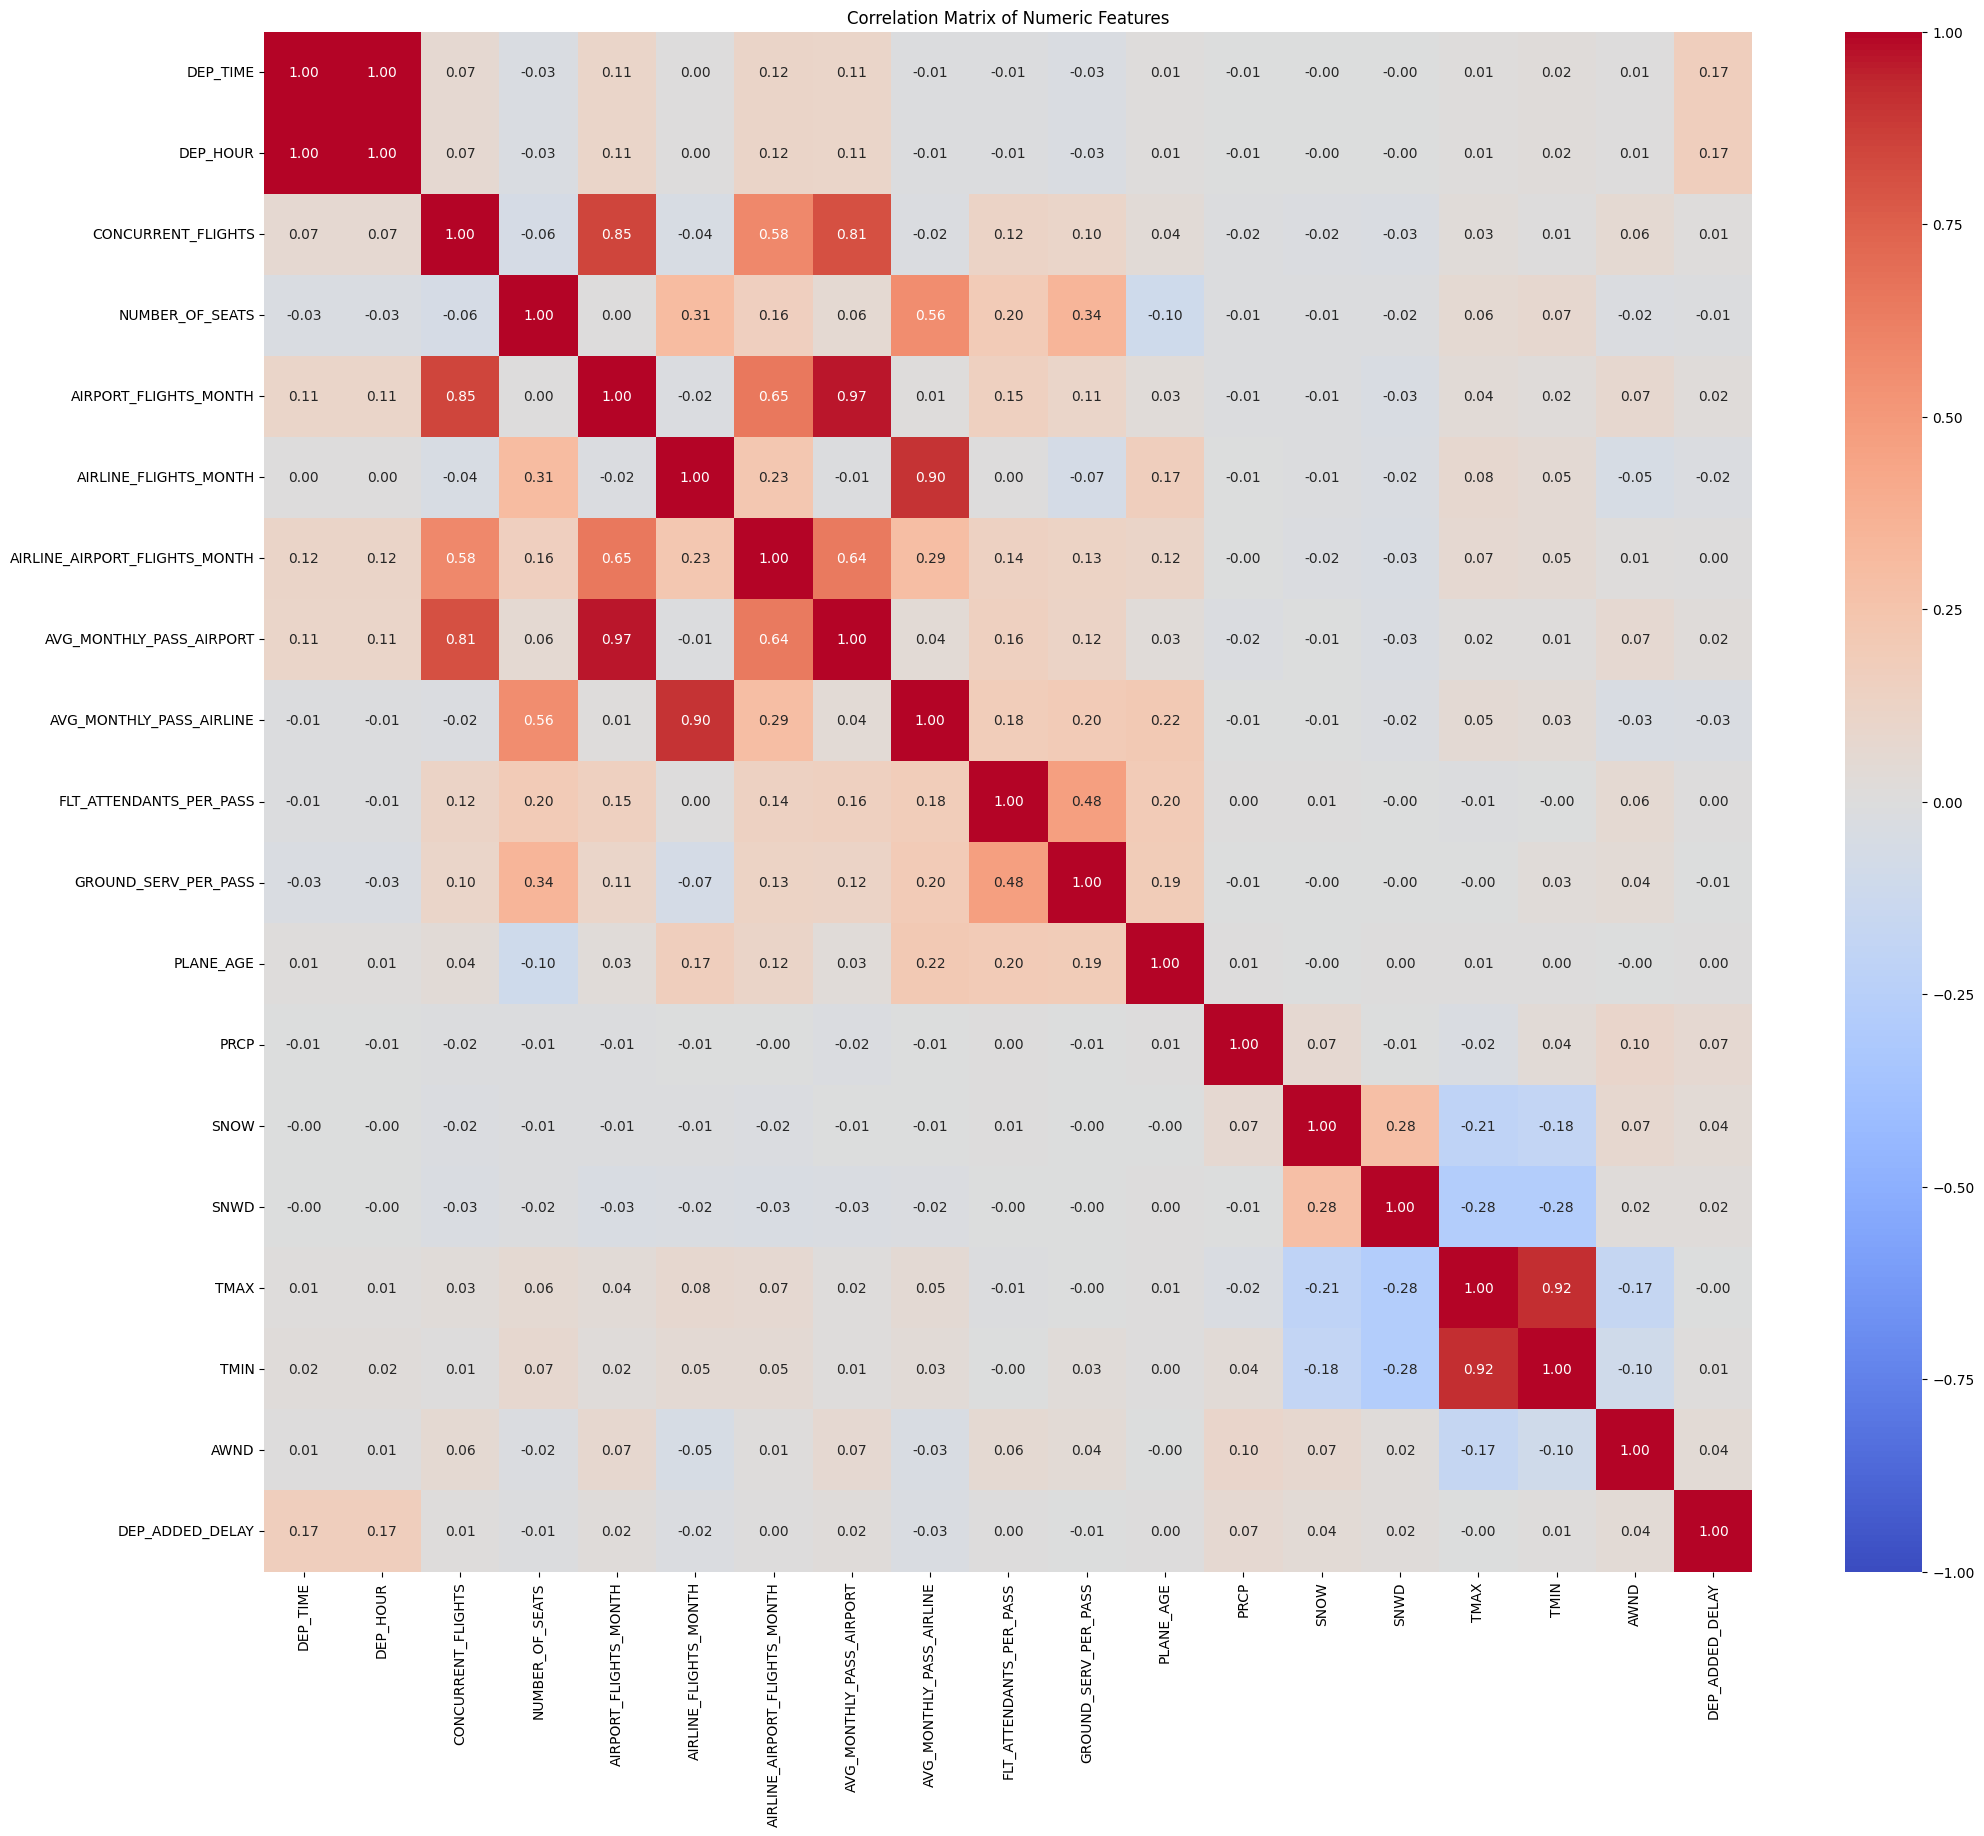

In [ ]:
# 1. Create list of feature columns excluding targets
feature_cols = [c for c in NUMERIC_COLS if c not in ['DEP_DELAY_NEW', 'DEP_DEL15']]
# 2. Calculate correlation matrix
corr_matrix = df[feature_cols].corr()

# 3. Visualize
plt.figure(figsize=(24, 20))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Numeric Features')
plt.show()

# 4. Identify high correlations (> 0.3)
high_corr_pairs = []
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        # Check for correlation > 0.3 (positive correlation as specified)
        if corr_matrix.iloc[i, j] > 0.3:
            high_corr_pairs.append((corr_matrix.columns[i], corr_matrix.columns[j], corr_matrix.iloc[i, j]))

In [ ]:
# 5. Print identified pairs
print("Correlated pairs (> 0.3):")
if not high_corr_pairs:
    print("No pairs found.")
else:
    for pair in high_corr_pairs:
        print(f"{pair[0]} - {pair[1]}: {pair[2]:.4f}")

Correlated pairs (> 0.3):
DEP_TIME - DEP_HOUR: 0.9984
CONCURRENT_FLIGHTS - AIRPORT_FLIGHTS_MONTH: 0.8495
CONCURRENT_FLIGHTS - AIRLINE_AIRPORT_FLIGHTS_MONTH: 0.5834
CONCURRENT_FLIGHTS - AVG_MONTHLY_PASS_AIRPORT: 0.8091
NUMBER_OF_SEATS - AIRLINE_FLIGHTS_MONTH: 0.3089
NUMBER_OF_SEATS - AVG_MONTHLY_PASS_AIRLINE: 0.5574
NUMBER_OF_SEATS - GROUND_SERV_PER_PASS: 0.3441
AIRPORT_FLIGHTS_MONTH - AIRLINE_AIRPORT_FLIGHTS_MONTH: 0.6491
AIRPORT_FLIGHTS_MONTH - AVG_MONTHLY_PASS_AIRPORT: 0.9680
AIRLINE_FLIGHTS_MONTH - AVG_MONTHLY_PASS_AIRLINE: 0.9031
AIRLINE_AIRPORT_FLIGHTS_MONTH - AVG_MONTHLY_PASS_AIRPORT: 0.6443
FLT_ATTENDANTS_PER_PASS - GROUND_SERV_PER_PASS: 0.4753
TMAX - TMIN: 0.9191


## Functions for Comparing Distributions
Older versions are also in Roy's previous eda notebook

In [9]:
def get_threshold_groups(df, thresholds=[0], target_col= NEW_REGR_TARGET):
    threshold_groups = {}
    for thresh in thresholds:
      # Group 2: Small Delays (The specific slice we are investigating)
      # Group 3: Large Delays (The hurdle overflow)
      # small = df[df[target_col] < thresh] # FOR OLD_REGR_TARGET
      # large = df[df[target_col] >= thresh]

      small = df[df[target_col] == thresh] # FOR NEW_REGR_TARGET
      large = df[df[target_col] > thresh]


      threshold_groups[thresh] = (small, large)

    return threshold_groups

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def compare_distributions(datasets, labels=None, title='Distribution Comparison', xlim=None):
    """
    Plots multiple distributions overlaid on each other.

    Parameters:
    - datasets: A list of arrays/lists (e.g. [data1, data2, data3]).
    - labels: A list of strings for the legend. If None, auto-generates 'Set 1', 'Set 2'...
    - title: String for the plot title.
    """
    plt.figure(figsize=(10, 6))

    # 1. Handle Labels: If no labels provided, create default ones (Set 1, Set 2...)
    if labels is None:
        labels = [f'Dataset {i+1}' for i in range(len(datasets))]

    # 2. Generate Colors: Create a distinct color for each dataset
    colors = sns.color_palette('tab10', n_colors=len(datasets))

    # 3. Iterate and Plot
    for i, data in tqdm(enumerate(datasets)):
        # Histogram
        plt.hist(data, bins='auto', alpha=0.3, density=True,
                 label=labels[i], color=colors[i], edgecolor=None)

        # KDE Line (using the same color)
        sns.kdeplot(data, color=colors[i], linewidth=2, warn_singular=True)

    if xlim:
      plt.xlim(xlim)
    plt.title(title)
    plt.xlabel('Value')
    plt.ylabel('Density')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

# # --- Example Usage with 3 Datasets ---
# d1 = np.random.normal(0, 1, 1000)      # Standard Normal
# d2 = np.random.normal(3, 1.5, 1000)    # Shifted/Wider
# d3 = np.random.gamma(2, 2, 1000)       # Skewed (Gamma distribution)

# # Pass them as a list
# data_list = [d1, d2, d3]
# label_list = ['Normal (0,1)', 'Normal (3,1.5)', 'Gamma (Skewed)']

# compare_distributions(data_list, labels=label_list)

In [5]:
def compare_zero_inflated(datasets, labels=None, title='Distribution Comparison', xlim=None):
    """
    Splits the visualization into two parts:
    1. A bar chart showing the % of Zeros (e.g., No Rain).
    2. A density plot of ONLY the Non-Zero values (e.g., Amount of Rain).
    """
    if labels is None:
        labels = [f'Dataset {i+1}' for i in range(len(datasets))]

    colors = sns.color_palette('tab10', n_colors=len(datasets))

    # Create a subplot with 2 columns: Left for Zeros, Right for Distribution
    fig, axes = plt.subplots(1, 2, figsize=(14, 6), gridspec_kw={'width_ratios': [1, 3]})

    # --- Plot 1: The "Hurdle" (Percentage of Zeros) ---
    zero_counts = [np.mean(d == 0) * 100 for d in datasets]
    axes[0].bar(labels, zero_counts, color=colors, alpha=0.7)
    axes[0].set_ylabel('Percent of Data that is Zero (%)')
    axes[0].set_title('Zero-Inflation Rate')
    axes[0].grid(axis='y', alpha=0.3)
    # Rotate labels if they are long
    axes[0].tick_params(axis='x', rotation=45)

    # --- Plot 2: The Distribution (Non-Zeros Only) ---
    for i, data in enumerate(datasets):
        # Filter for strictly positive values
        nonzero_data = data[data > 0]

        if len(nonzero_data) > 0:
            # Histogram
            axes[1].hist(nonzero_data, bins=30, alpha=0.3, density=True,
                         color=colors[i], label=labels[i])
            # KDE
            # 'cut=0' stops the KDE from extending past the data range (prevents negative rain)
            sns.kdeplot(nonzero_data, color=colors[i], linewidth=2, ax=axes[1], cut=0)

    if xlim:
      axes[1].set_xlim(xlim)
    axes[1].set_title(f'{title} (Non-Zero Only)')
    axes[1].set_xlabel('Value (e.g., Precipitation Amount)')
    axes[1].set_ylabel('Density')
    axes[1].legend()
    axes[1].grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

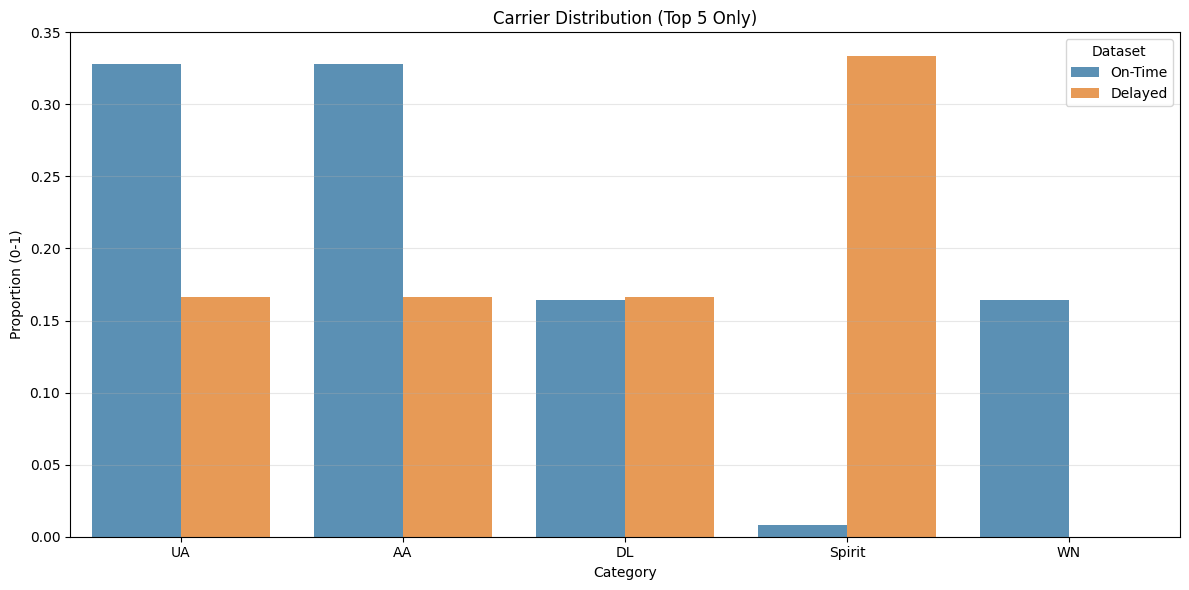

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def compare_categorical(datasets, labels=None, title='Categorical Comparison', order=None, top_n=None):
    """
    Compares categorical variables using a Grouped Bar Chart.

    Parameters:
    - datasets: List of lists/arrays/Series containing categorical data.
    - labels: List of names for the groups (e.g., ['0-Delay', 'Large Delay']).
    - title: String for the plot title.
    - order: Optional list to enforce specific order of categories on X-axis.
    - top_n: Integer. If provided, limits the plot to the top N most frequent categories (globally).
    """
    if labels is None:
        labels = [f'Group {i+1}' for i in range(len(datasets))]

    # 1. Convert inputs into a single DataFrame for Seaborn
    combined_data = []

    # We also collect all raw data to calculate global frequency for top_n
    all_raw_data = []

    for i, data in enumerate(datasets):
        series = pd.Series(data, name='Category')
        all_raw_data.append(series)

        # Calculate percentages for this specific group
        counts = series.value_counts(normalize=True).reset_index()
        counts.columns = ['Category', 'Percentage']
        counts['Group'] = labels[i]
        combined_data.append(counts)

    df_plot = pd.concat(combined_data, ignore_index=True)

    # 2. Handle 'top_n' Logic
    if top_n is not None:
        # Combine all datasets to find the GLOBAL most frequent categories
        global_series = pd.concat(all_raw_data)
        top_categories = global_series.value_counts().head(top_n).index.tolist()

        # Filter the plotting data to only include these top categories
        df_plot = df_plot[df_plot['Category'].isin(top_categories)]

        # If the user didn't specify an order, sort by global frequency
        if order is None:
            order = top_categories

    # Helper function to clean individual airport names or parts of a route
    def clean_airport_name_part(name_part):
        if name_part == "Los Angeles International":
            return "LA"
        elif name_part == "Ronald Reagan Washington National":
            return "Washington DC"
        elif name_part == 'San Francisco International':
          return 'SF'
        elif isinstance(name_part, str) and ' ' in name_part:
            # Take only the first word for multi-word names not specifically handled
            return name_part.split(' ')[0]
        return name_part # Return as is if not a string or single word

    # Define a helper function for category cleaning that applies to routes and single airports
    def clean_category_name(cat_name):
        if isinstance(cat_name, str):
            if ' - ' in cat_name:
                # Split by ' - ', clean each part, then join with ' - '
                parts = cat_name.split(' - ')
                cleaned_parts = [clean_airport_name_part(part) for part in parts]
                return ' - '.join(cleaned_parts)
            else:
                # Clean single airport names
                return clean_airport_name_part(cat_name)
        return cat_name # Return as is if not a string

    # Apply cleaning to df_plot['Category']
    df_plot['Category'] = df_plot['Category'].apply(clean_category_name)

    # Apply cleaning to 'order' list if it exists
    if order is not None:
        order = [clean_category_name(cat) for cat in order]

    # 3. Plot
    plt.figure(figsize=(12, 6))
    sns.barplot(data=df_plot, x='Category', y='Percentage', hue='Group',
                order=order, palette='tab10', alpha=0.8, errorbar=None)

    plt.title(title)
    plt.ylabel('Proportion (0-1)')
    plt.xlabel('Category')

    # Rotate x-labels if there are many categories
    if (top_n and top_n > 5) or (order and len(order) > 5):
        plt.xticks(rotation=45)

    plt.grid(axis='y', alpha=0.3)
    plt.legend(title='Dataset')
    plt.tight_layout()
    plt.show()

# --- Example Usage ---
# Imagine 'Carrier' data where some airlines are very rare
carriers_ontime = ['UA', 'AA', 'DL', 'UA', 'AA', 'WN'] * 100 + ['Spirit', 'JetBlue'] * 5
carriers_delayed = ['UA', 'AA', 'DL'] * 50 + ['Spirit', 'Spirit', 'JetBlue'] * 50

# Only show the top 5 carriers, automatically sorted by frequency
compare_categorical(
    [carriers_ontime, carriers_delayed],
    labels=['On-Time', 'Delayed'],
    title="Carrier Distribution (Top 5 Only)",
    top_n=5
)

In [7]:
def compare_counts_boxplot(datasets, labels=None, title='Count Distribution Comparison'):
    """
    Compares discrete numerical distributions using Box Plots.
    Best for variables like 'Number of Concurrent Flights'.
    """
    if labels is None:
        labels = [f'Group {i+1}' for i in range(len(datasets))]

    # 1. Combine data into Long Format for Seaborn
    # (Seaborn handles boxplots best when data is in one DataFrame)
    combined_data = []
    for i, data in enumerate(datasets):
        df_temp = pd.DataFrame({'Value': data})
        df_temp['Group'] = labels[i]
        combined_data.append(df_temp)

    df_plot = pd.concat(combined_data, ignore_index=True)

    # 2. Plot
    plt.figure(figsize=(10, 6))

    # Boxplot shows Median, IQR, and Outliers
    sns.boxplot(data=df_plot, x='Group', y='Value', palette='tab10', showfliers=False)

    # Optional: Add a "Strip Plot" on top to see the actual density of dots
    # (Good if you have < 1000 data points, otherwise it gets too crowded)
    # sns.stripplot(data=df_plot, x='Group', y='Value', color='black', alpha=0.2, jitter=True)

    plt.title(title)
    plt.grid(axis='y', alpha=0.3)
    plt.show()

# # --- Example Usage ---
# # Concurrent flights: Maybe delays happen when airports are busier?
# concurrent_ontime = np.random.poisson(lam=10, size=1000)   # Avg 10 flights
# concurrent_delayed = np.random.poisson(lam=15, size=1000)  # Avg 15 flights

# compare_counts_boxplot([concurrent_ontime, concurrent_delayed],
#                        labels=['On-Time', 'Delayed'],
#                        title="Concurrent Flights Distribution")

In [ ]:
# # DEP_TIME goes from 0001 - 2400
# df['DEP_HOUR'] = df['DEP_TIME']//100
# df['DEP_HOUR'] = np.where(df['DEP_HOUR'] == 24, 0, df['DEP_HOUR'])
# df['DEP_HOUR'].clip(0, 23) # clip purely for safety
# df['DEP_HOUR'].describe()

In [10]:
# --- EXECUTION ---

# 1. Load your data
df = df

# 2. Define your settings:

thresh_sweep = [0] # THRESHOLD SWEEP FOR DEP_ADDED_DELAY NOW

# Select the most "physical" features where operational variance implies physical similarity
# features_to_check = ['AWND', 'TMAX', 'TMIN', 'PRCP', 'SNOW', 'SNWD', 'SEGMENT_NUMBER', 'CARRIER_NAME']
threshold_groups = get_threshold_groups(df, thresh_sweep)
zero_group = df[df['DEP_DELAY_NEW'] == 0]

# labels = ['0-Delay', 'On-Time [0-15)', 'Delay >= 15'] # FOR DEP_DELAY_NEW
# FOR DEP_ADDED_DELAY
labels = ['Strictly No Delay', 'No Added Delay (ADDED_DELAY = 0)', 'Large Delay (ADDED_DELAY > 0)']

## How Zero-Inflated is the data (DEP_DEL15, DEP_ADDED_DELAY)


,,proportion
DEP_DEL15,DEP_DEL15,
0,0,1.0
1,1,1.0


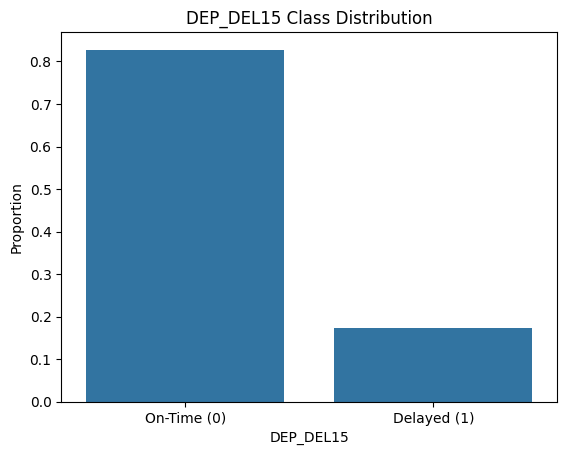

In [25]:
x, y = "DEP_DEL15", "Proportion"

(df[x]
 .value_counts(normalize=True)
 .rename(y)
 .reset_index()
 .pipe((sns.barplot, "data"), x=x, y=y))

plt.xticks(ticks=[0, 1], labels=['On-Time (0)', 'Delayed (1)'])
plt.title('DEP_DEL15 Class Distribution')
plt.xlabel("DEP_DEL15")
plt.show()

In [ ]:
col='DEP_ADDED_DELAY'
dep_del_new_bins = pd.Series(df[col].value_counts(normalize=True))
dep_del_new_bins

,proportion
DEP_ADDED_DELAY,
0,0.827573
1,0.006406
2,0.005920
3,0.005601
4,0.005297
...,...
107,0.000363
111,0.000360
110,0.000355


In [ ]:
# col = 'DEP_ADDED_DELAY'
# labels = ['Full Dataset']
# print(df[col].value_counts(normalize=True))
# compare_distributions([df[col]], labels, title=f"{col} Distribution")

1it [00:00,  3.62it/s]


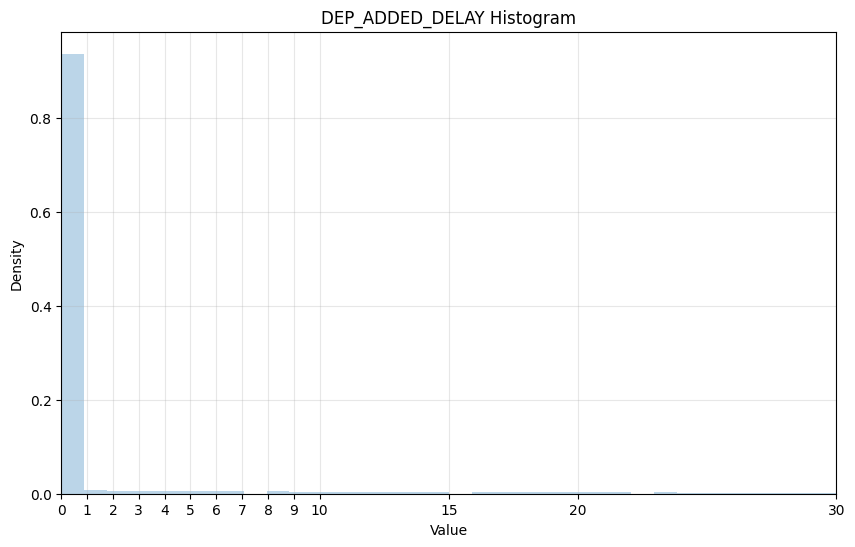

In [ ]:
col = 'DEP_ADDED_DELAY'
n_bins = 'auto'
n_bins = 114
datasets=[df[col]]
xlim=(0, 30)
title=f"{col} Histogram"

plt.figure(figsize=(10, 6))

# 2. Generate Colors: Create a distinct color for each dataset
colors = sns.color_palette('tab10', n_colors=len(datasets))

# 3. Iterate and Plot
for i, data in tqdm(enumerate(datasets)):
    # Histogram
    plt.hist(data, bins=n_bins, alpha=0.3, density=True,
              label=None, color=colors[i], edgecolor=None)

    # KDE Line (using the same color)
    # sns.kdeplot(data, color=colors[i], linewidth=2, warn_singular=True)

if xlim:
  plt.xlim(xlim)
plt.xticks(np.concatenate((np.arange(0, 11, 1), np.arange(15, 21, 5), np.arange(30, 31, 1))))
plt.title(title)
plt.xlabel('Value')
plt.ylabel('Density')
# plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

1it [00:00,  4.55it/s]


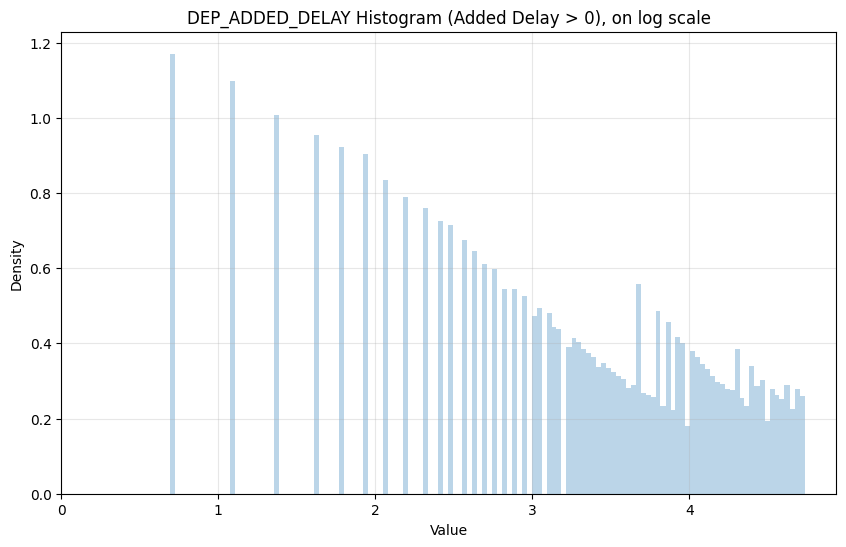

In [ ]:
col = 'DEP_ADDED_DELAY'
n_bins = 'auto'
n_bins = 128
datasets=[np.log1p(df.loc[df[col] > 0][col])]
xlim=(0, None)
title=f"{col} Histogram (Added Delay > 0), on log scale"

plt.figure(figsize=(10, 6))

# 2. Generate Colors: Create a distinct color for each dataset
colors = sns.color_palette('tab10', n_colors=len(datasets))

# 3. Iterate and Plot
for i, data in tqdm(enumerate(datasets)):
    # Histogram
    plt.hist(data, bins=n_bins, alpha=0.3, density=True,
              label=None, color=colors[i], edgecolor=None)

    # KDE Line (using the same color)
    # sns.kdeplot(data, color=colors[i], linewidth=2, warn_singular=True)

if xlim:
  plt.xlim(xlim)
# plt.xticks(np.concatenate(np.arange(15, )))
plt.title(title)
plt.xlabel('Value')
plt.ylabel('Density')
# plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

1it [00:00,  4.32it/s]


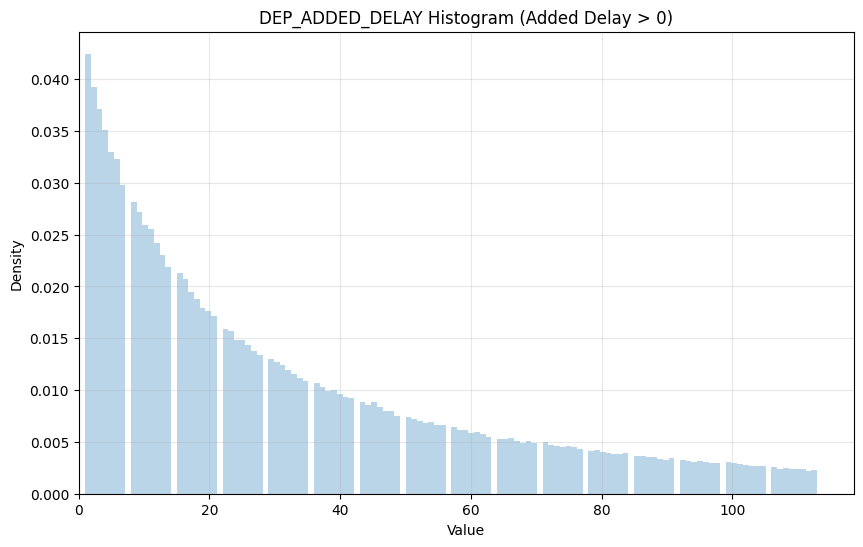

In [ ]:
col = 'DEP_ADDED_DELAY'
n_bins = 'auto'
n_bins = 128
datasets=[df.loc[df[col] > 0][col]]
xlim=(0, None)
title=f"{col} Histogram (Added Delay > 0)"

plt.figure(figsize=(10, 6))

# 2. Generate Colors: Create a distinct color for each dataset
colors = sns.color_palette('tab10', n_colors=len(datasets))

# 3. Iterate and Plot
for i, data in tqdm(enumerate(datasets)):
    # Histogram
    plt.hist(data, bins=n_bins, alpha=0.3, density=True,
              label=None, color=colors[i], edgecolor=None)

    # KDE Line (using the same color)
    # sns.kdeplot(data, color=colors[i], linewidth=2, warn_singular=True)

if xlim:
  plt.xlim(xlim)
# plt.xticks(np.concatenate(np.arange(15, )))
plt.title(title)
plt.xlabel('Value')
plt.ylabel('Density')
# plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [ ]:
df['DEP_DEL15'].value_counts(normalize=True)

,proportion
DEP_DEL15,
0,0.827573
1,0.172427


## Check Distributions for Features that We Engineered
('DEP_HOUR', 'DESTINATION_AIRPORT', 'ROUTE_NAME','INCOMING_ROUTE', 'CARRIER_AIRPORT', 'IS_HEAVY_RAIN', 'IS_SNOWY', 'IS_FREEZING', 'IS_EXTREME_HEAT', 'SEASON')

### DEP HOUR and DEP TIME BLK

DEP_HOUR
8.0     0.066787
7.0     0.062268
6.0     0.060959
9.0     0.060590
12.0    0.060432
17.0    0.060322
11.0    0.060293
10.0    0.059731
15.0    0.058662
14.0    0.056385
18.0    0.056299
16.0    0.056152
19.0    0.054295
13.0    0.053967
20.0    0.052550
21.0    0.036814
5.0     0.033787
22.0    0.031289
23.0    0.010646
0.0     0.004035
4.0     0.002159
1.0     0.001292
2.0     0.000248
3.0     0.000039
Name: proportion, dtype: float64


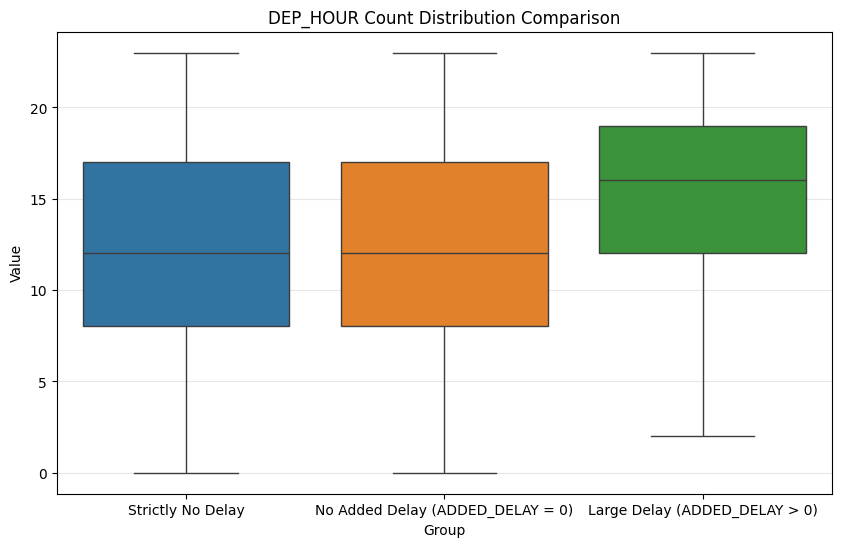

In [ ]:
col = 'DEP_HOUR'
datasets = [zero_group[col]]
for thresh in threshold_groups:
  small_delay_group, large_delay_group = threshold_groups[thresh]
  datasets.append(small_delay_group[col])
  datasets.append(large_delay_group[col])

print(df[col].value_counts(normalize=True))
compare_counts_boxplot(datasets, labels, title=f"{col} Count Distribution Comparison")

DEP_HOUR
8.0     0.066787
7.0     0.062268
6.0     0.060959
9.0     0.060590
12.0    0.060432
17.0    0.060322
11.0    0.060293
10.0    0.059731
15.0    0.058662
14.0    0.056385
18.0    0.056299
16.0    0.056152
19.0    0.054295
13.0    0.053967
20.0    0.052550
21.0    0.036814
5.0     0.033787
22.0    0.031289
23.0    0.010646
0.0     0.004035
4.0     0.002159
1.0     0.001292
2.0     0.000248
3.0     0.000039
Name: proportion, dtype: float64


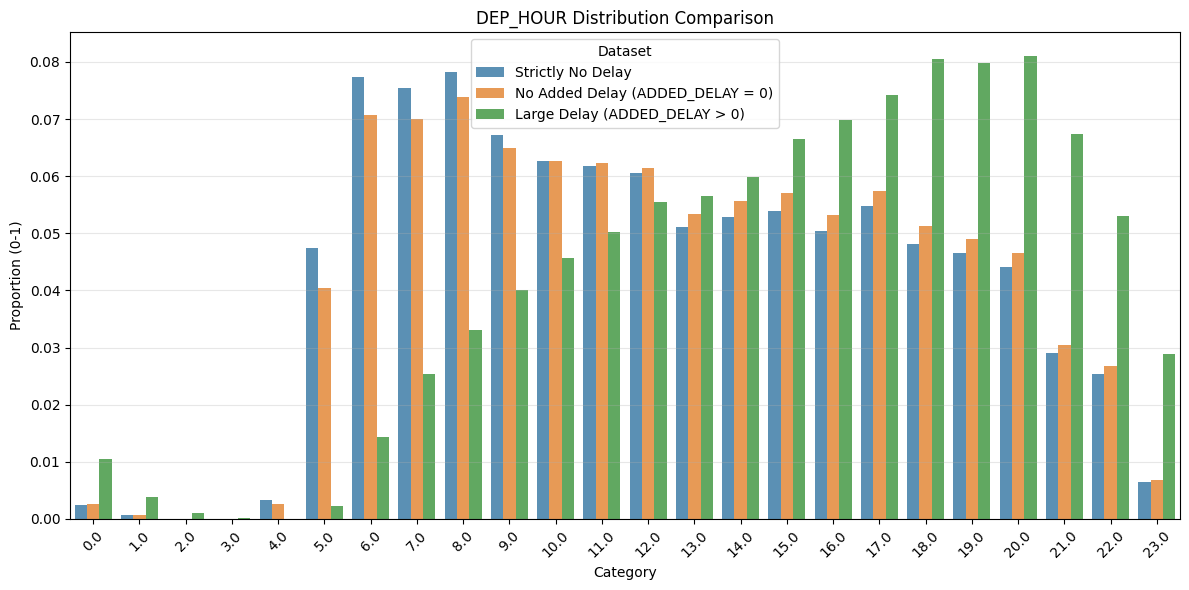

In [ ]:
col = 'DEP_HOUR'
datasets = [zero_group[col]]
for thresh in threshold_groups:
  small_delay_group, large_delay_group = threshold_groups[thresh]
  datasets.append(small_delay_group[col])
  datasets.append(large_delay_group[col])

print(df[col].value_counts(normalize=True))
compare_categorical(datasets, labels, title=f"{col} Distribution Comparison", top_n = 24, order = [float(i) for i in range(0, 24)])

DEP_TIME_BLK
0800-0859    0.070316
0700-0759    0.067860
0600-0659    0.067115
1700-1759    0.062332
1000-1059    0.061659
0900-0959    0.061519
1200-1259    0.061434
1100-1159    0.061115
1500-1559    0.059595
1400-1459    0.057749
1800-1859    0.057030
1600-1659    0.056366
1900-1959    0.054510
1300-1359    0.054453
2000-2059    0.052236
2100-2159    0.033899
2200-2259    0.029791
0001-0559    0.023162
2300-2359    0.007857
Name: proportion, dtype: float64


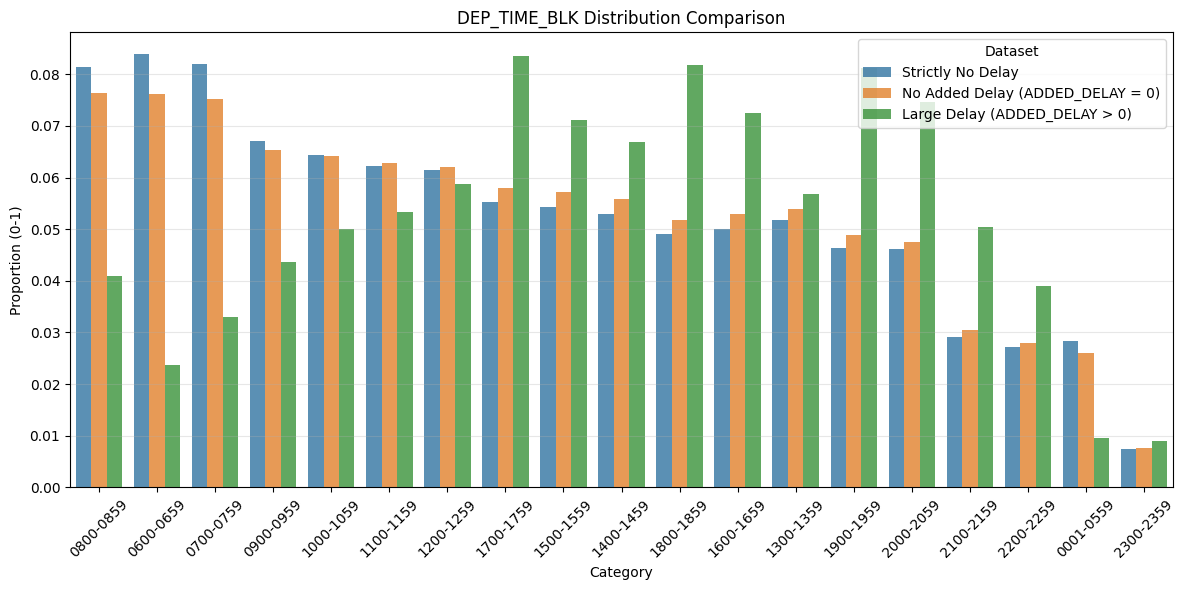

In [ ]:
col = 'DEP_TIME_BLK'
datasets = [zero_group[col]]
for thresh in threshold_groups:
  small_delay_group, large_delay_group = threshold_groups[thresh]
  datasets.append(small_delay_group[col])
  datasets.append(large_delay_group[col])

print(df[col].value_counts(normalize=True))
compare_categorical(datasets, labels, title=f"{col} Distribution Comparison", top_n = 24)

DESTINATION_AIRPORT
Atlanta Municipal                              4.502358e-02
Chicago O'Hare International                   3.925241e-02
Stapleton International                        3.116305e-02
Los Angeles International                      3.086248e-02
Dallas Fort Worth Regional                     3.044584e-02
                                                   ...     
Pitt Greenville                                1.211077e-05
King Salmon Airport                            9.594244e-06
Hagerstown Regional-Richard A. Henson Field    7.077721e-06
Owensboro Daviess County                       3.617502e-06
Wiley Post/Will Rogers Memorial                1.572827e-07
Name: proportion, Length: 352, dtype: float64


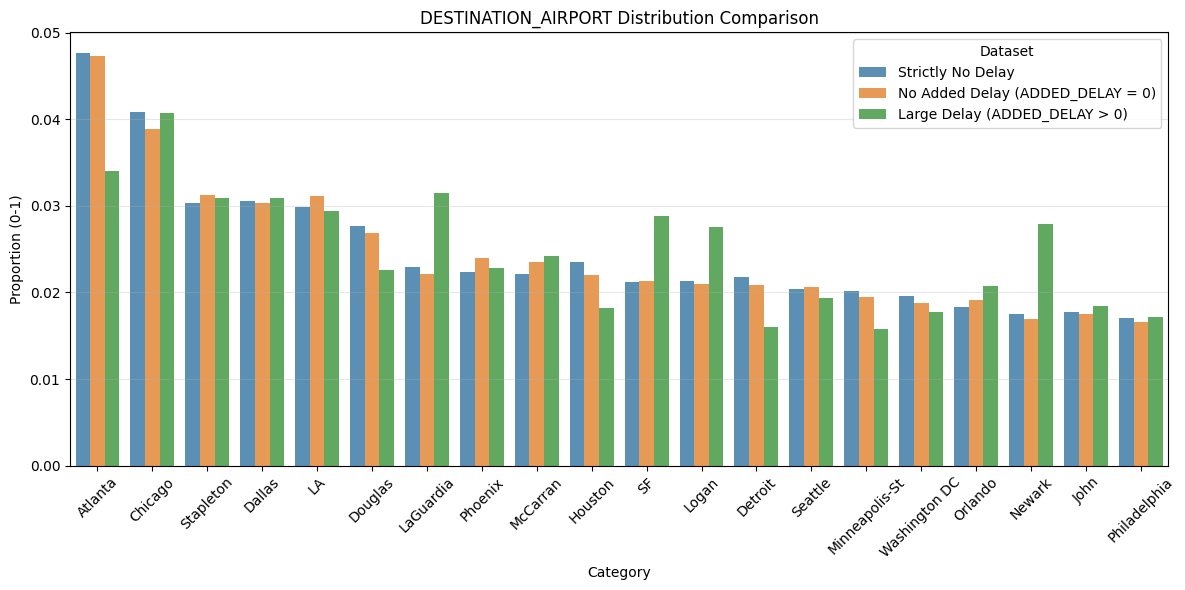

In [ ]:
col = 'DESTINATION_AIRPORT'
datasets = [zero_group[col]]
for thresh in threshold_groups:
  small_delay_group, large_delay_group = threshold_groups[thresh]
  datasets.append(small_delay_group[col])
  datasets.append(large_delay_group[col])

print(df[col].value_counts(normalize=True))
compare_categorical(datasets, labels, title=f"{col} Distribution Comparison", top_n = 20)

PREVIOUS_AIRPORT
NONE                            2.234156e-01
Atlanta Municipal               3.209259e-02
Chicago O'Hare International    2.748452e-02
Stapleton International         2.128790e-02
Dallas Fort Worth Regional      2.058012e-02
                                    ...     
Adak NS                         4.089350e-06
Pago Pago International         2.044675e-06
Owensboro Daviess County        1.730110e-06
Yakutat Airport                 4.718481e-07
Petersburg James A Johnson      3.145654e-07
Name: proportion, Length: 356, dtype: float64


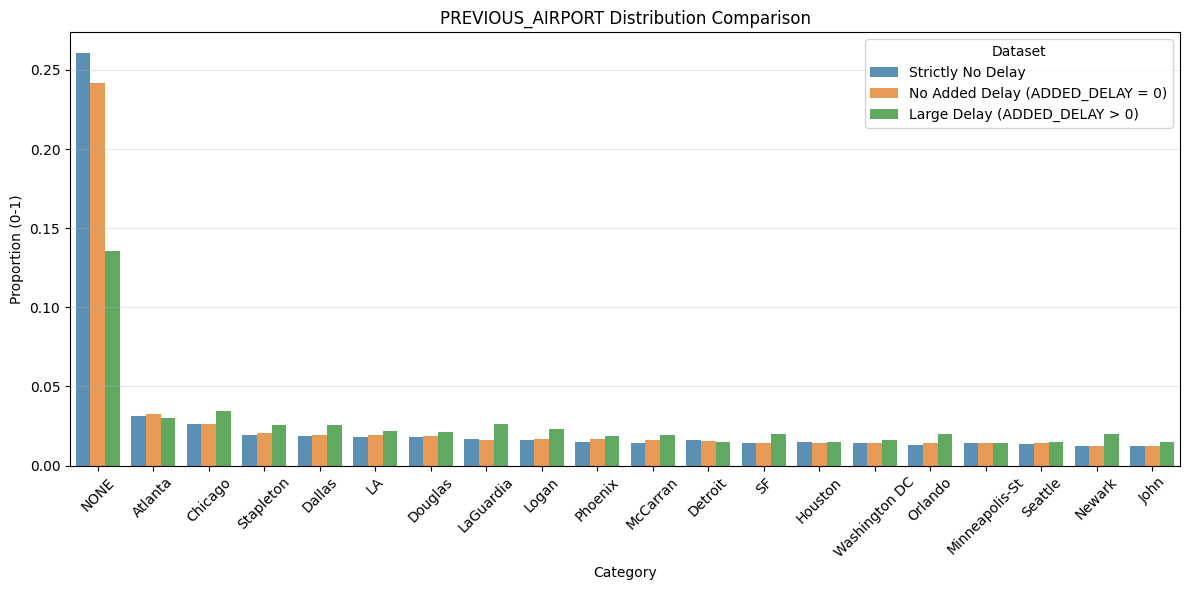

In [ ]:
col = 'PREVIOUS_AIRPORT'
datasets = [zero_group[col]]
for thresh in threshold_groups:
  small_delay_group, large_delay_group = threshold_groups[thresh]
  datasets.append(small_delay_group[col])
  datasets.append(large_delay_group[col])

print(df[col].value_counts(normalize=True))
compare_categorical(datasets, labels, title=f"{col} Distribution Comparison", top_n = 20)

ROUTE_NAME
San Francisco International - Los Angeles International        0.002165
Los Angeles International - San Francisco International        0.002159
Chicago O'Hare International - LaGuardia                       0.002144
LaGuardia - Chicago O'Hare International                       0.002142
John F. Kennedy International - Los Angeles International      0.001963
Los Angeles International - John F. Kennedy International      0.001961
Los Angeles International - McCarran International             0.001807
McCarran International - Los Angeles International             0.001799
Honolulu International - Kahului Airport                       0.001683
Kahului Airport - Honolulu International                       0.001682
LaGuardia - Logan International                                0.001497
Logan International - LaGuardia                                0.001484
Atlanta Municipal - LaGuardia                                  0.001444
Orlando International - Atlanta Municipal            

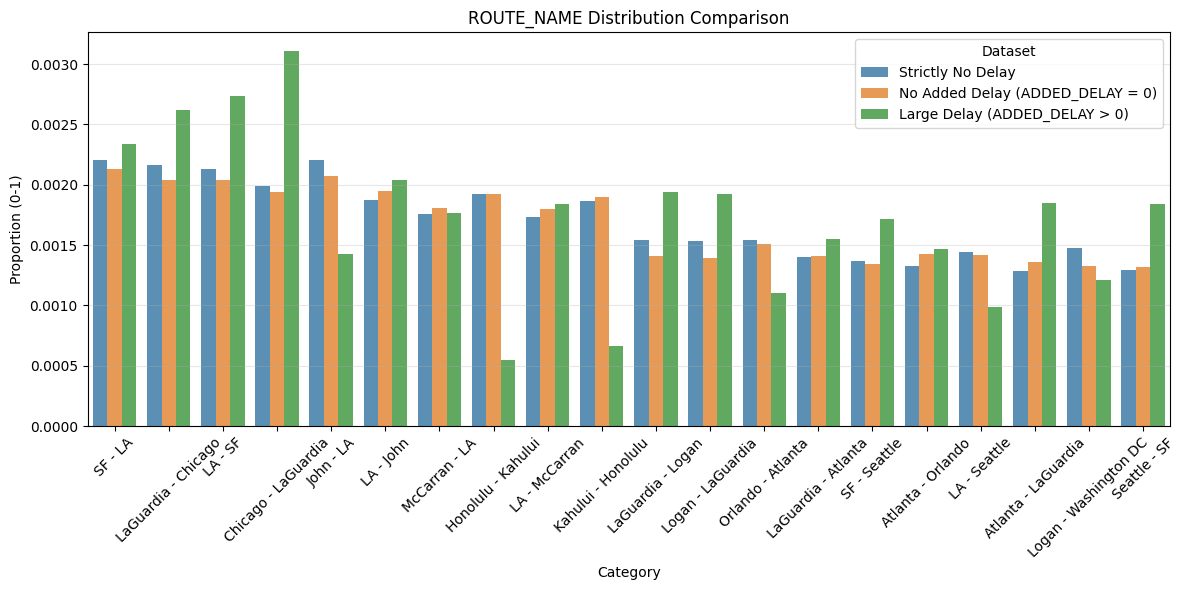

In [ ]:
col = 'ROUTE_NAME'
datasets = [zero_group[col]]
for thresh in threshold_groups:
  small_delay_group, large_delay_group = threshold_groups[thresh]
  datasets.append(small_delay_group[col])
  datasets.append(large_delay_group[col])

print(df[col].value_counts(normalize=True).head(20))
compare_categorical(datasets, labels, title=f"{col} Distribution Comparison", top_n = 20)

#### Investigating INCOMING_ROUTE: Are None's in the Previous Airport position indicative of flights that are early in the day/early in the flights for the day?

INCOMING_ROUTE
NONE - Chicago O'Hare International                                  8.327489e-03
NONE - Los Angeles International                                     8.007733e-03
NONE - Atlanta Municipal                                             7.804996e-03
NONE - Dallas Fort Worth Regional                                    7.460704e-03
NONE - John F. Kennedy International                                 7.172090e-03
                                                                         ...     
Greater Peoria - Houston Intercontinental                            1.572827e-07
Greenville-Spartanburg - Greater Buffalo International               1.572827e-07
Joslin Field - Magic Valley Regional - Detroit Metro Wayne County    1.572827e-07
Charleston International - Los Angeles International                 1.572827e-07
Adams Field - Nashville International                                1.572827e-07
Name: proportion, Length: 7204, dtype: float64


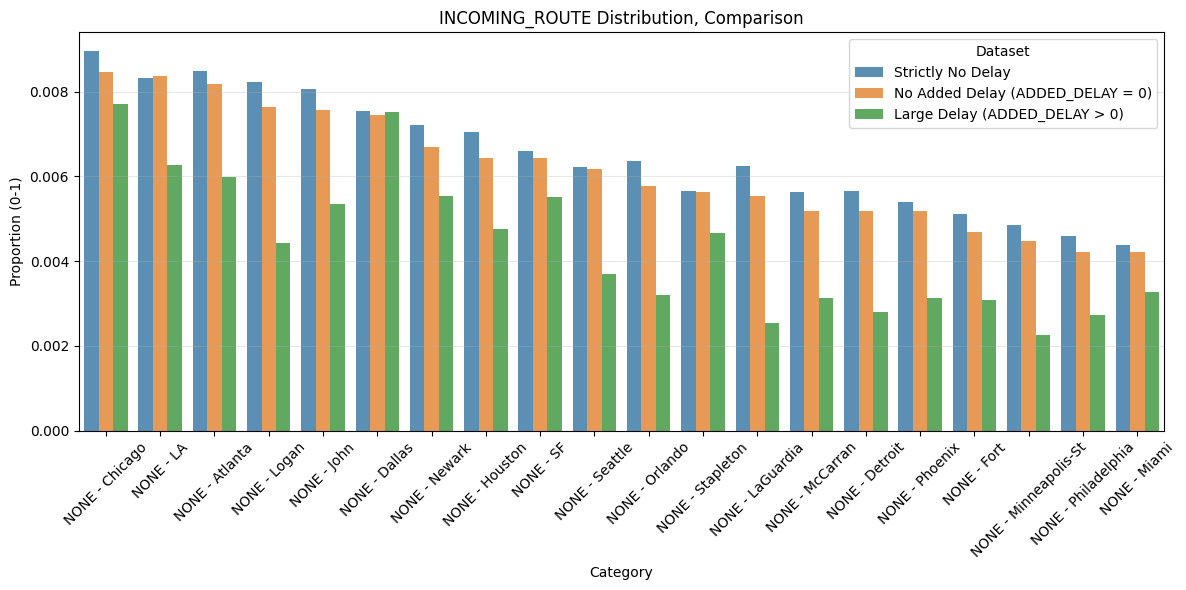

In [ ]:
col = 'INCOMING_ROUTE'
datasets = [zero_group[col]]
for thresh in threshold_groups:
  small_delay_group, large_delay_group = threshold_groups[thresh]
  datasets.append(small_delay_group[col])
  datasets.append(large_delay_group[col])

print(df[col].value_counts(normalize=True))
compare_categorical(datasets, labels, title=f"{col} Distribution, Comparison", top_n = 20)

##### This confirms that flights with NONE as previous airport are likely the first flight in the segment of flights for that aircraft for that day

In [ ]:
1420472/len(df)

0.22341564827439664

In [ ]:
df.loc[df['PREVIOUS_AIRPORT'] == 'NONE']

,MONTH,DAY_OF_WEEK,DEP_TIME,DEP_DELAY_NEW,DEP_DEL15,DEP_TIME_BLK,DISTANCE_GROUP,DEP_HOUR,SEGMENT_NUMBER,CONCURRENT_FLIGHTS,...,WT10,WT11,AWND_missing,TMIN_missing,TMAX_missing,IS_HEAVY_RAIN,IS_SNOWY,IS_FREEZING,IS_EXTREME_HEAT,SEASON
0,1,3,1652.0,0,0,1600-1659,7,16.0,1,25,...,0.0,0.0,0,0,0,1,1,1,0,0
1,1,3,822.0,0,0,0800-0859,10,8.0,1,34,...,0.0,0.0,0,0,0,0,0,1,0,0
2,1,3,644.0,44,1,0600-0659,4,6.0,1,16,...,0.0,0.0,0,0,0,0,0,1,0,0
4,1,3,556.0,0,0,0600-0659,3,5.0,1,11,...,0.0,0.0,0,0,0,0,0,1,0,0
5,1,3,607.0,0,0,0600-0659,2,6.0,1,30,...,0.0,0.0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6061261,12,7,601.0,11,0,0001-0559,5,6.0,1,25,...,0.0,0.0,0,0,0,0,0,1,0,0
6061262,12,7,530.0,0,0,0001-0559,4,5.0,1,25,...,0.0,0.0,0,0,0,0,0,1,0,0
6061263,12,2,1407.0,8,0,1300-1359,7,14.0,1,13,...,0.0,0.0,0,0,0,0,0,0,0,0
6061264,12,2,558.0,0,0,0600-0659,5,5.0,1,30,...,0.0,0.0,0,0,0,0,0,0,0,0


In [ ]:
df.loc[df['PREVIOUS_AIRPORT'] == 'NONE']['DEP_TIME_BLK'].value_counts()

,count
DEP_TIME_BLK,
0600-0659,409230
0700-0759,344567
0800-0859,215318
0001-0559,143930
0900-0959,87964
1000-1059,41961
1100-1159,27746
1200-1259,23425
1300-1359,14963


In [ ]:
# Check the average delay for "First Flights" (NONE) vs "Connecting Flights"
# We assume 'INCOMING_ROUTE' is already created in your dataframe/pipeline
# If not, use the raw 'PREVIOUS_AIRPORT' column

# 1. Create a flag for "First Flight"
# Note: Adjust logic if your NaNs are actual NaNs, not the string "NONE"
is_first_flight = df['PREVIOUS_AIRPORT'].astype(str).str.contains('NONE|nan', case=False)

print(f"Percentage of flights with PREVIOUS_AIRPORT as NONE: {is_first_flight.mean()*100:.1f}%")
print(f"Number of flights with PREVIOUS_AIRPORT as NONE: {is_first_flight.sum():,}")

# 2. Compare Delay Rates
avg_delay_first = df['DEP_DEL15'][is_first_flight].mean()
avg_delay_connect = df['DEP_DEL15'][~is_first_flight].mean()

print(f"Average Delay ('First Flights'):   {avg_delay_first:.2f} mins")
print(f"Average Delay ('Connecting'):      {avg_delay_connect:.2f} mins")

# 3. Check Time Distribution
print("\nMost common morning (5 AM - 11 AM) hours for 'First Flights':")
df_dep_morn_hours = df[is_first_flight].loc[(df['DEP_HOUR'] >= 5) &  (df['DEP_HOUR'] <= 11)]
print(df_dep_morn_hours['DEP_HOUR'].value_counts())
print(f"Percent of 'First Flights' occuring in the morning (5-11AM): {df_dep_morn_hours['DEP_HOUR'].value_counts().values.sum() / len(df.loc[df['PREVIOUS_AIRPORT'] == 'NONE'])}")

Percentage of flights with PREVIOUS_AIRPORT as NONE: 22.4%
Number of flights with PREVIOUS_AIRPORT as NONE: 1,422,001
Average Delay ('First Flights'):   0.10 mins
Average Delay ('Connecting'):      0.19 mins

Most common morning (5 AM - 11 AM) hours for 'First Flights':
DEP_HOUR
6.0     369535
7.0     305968
5.0     210467
8.0     195359
9.0      83197
10.0     42334
11.0     28327
Name: count, dtype: int64
Percent of 'First Flights' occuring in the morning (5-11AM): 0.8695609628348887


In [ ]:
df_dep_seg_num = df[is_first_flight]['SEGMENT_NUMBER']
print(df_dep_seg_num.value_counts(normalize=True))

print(f"Percent of 'First Flights' with SEGMENT_NUMBER = 1: 0.998925%")

SEGMENT_NUMBER
1     0.998925
4     0.000243
2     0.000239
6     0.000166
5     0.000164
3     0.000152
7     0.000073
8     0.000032
9     0.000006
10    0.000001
Name: proportion, dtype: float64
Percent of 'First Flights' with SEGMENT_NUMBER = 1 : 0.998925%


#### CARRIER_AIRPORT

CARRIER_AIRPORT
Delta Air Lines Inc. - Atlanta Municipal                           3.790465e-02
American Airlines Inc. - Dallas Fort Worth Regional                2.310168e-02
American Airlines Inc. - Douglas Municipal                         1.516425e-02
Comair Inc. - Douglas Municipal                                    1.449439e-02
United Air Lines Inc. - Chicago O'Hare International               1.173156e-02
                                                                       ...     
Endeavor Air Inc. - Fort Lauderdale-Hollywood International        4.718481e-07
United Air Lines Inc. - Greenville-Spartanburg                     3.145654e-07
Midwest Airline, Inc. - Boise Air Terminal                         3.145654e-07
Atlantic Southeast Airlines - Southwest Florida International      3.145654e-07
American Eagle Airlines Inc. - Austin - Bergstrom International    3.145654e-07
Name: proportion, Length: 1124, dtype: float64


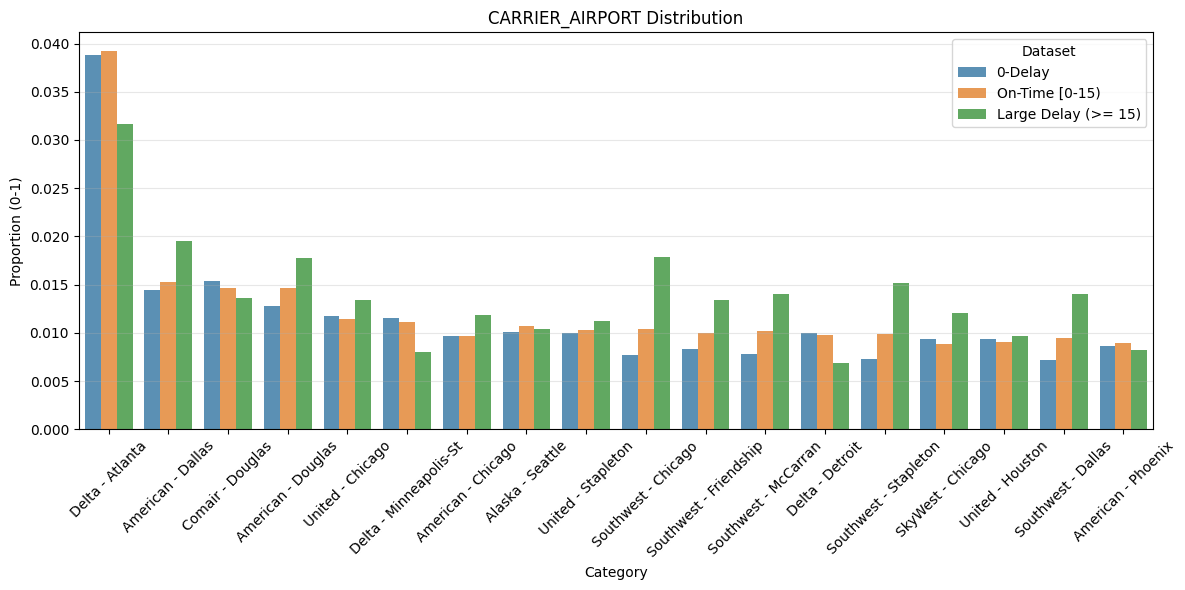

In [ ]:
col = 'CARRIER_AIRPORT'
datasets = [zero_group[col]]
for thresh in threshold_groups:
  small_delay_group, large_delay_group = threshold_groups[thresh]
  datasets.append(small_delay_group[col])
  datasets.append(large_delay_group[col])

labels = ['0-Delay', 'On-Time [0-15)', 'Large Delay (>= 15)']
print(df[col].value_counts(normalize=True))
compare_categorical(datasets, labels, title=f"{col} Distribution", top_n = 20)

#### Weather Severity and Season

IS_HEAVY_RAIN
0    0.795324
1    0.204676
Name: proportion, dtype: float64


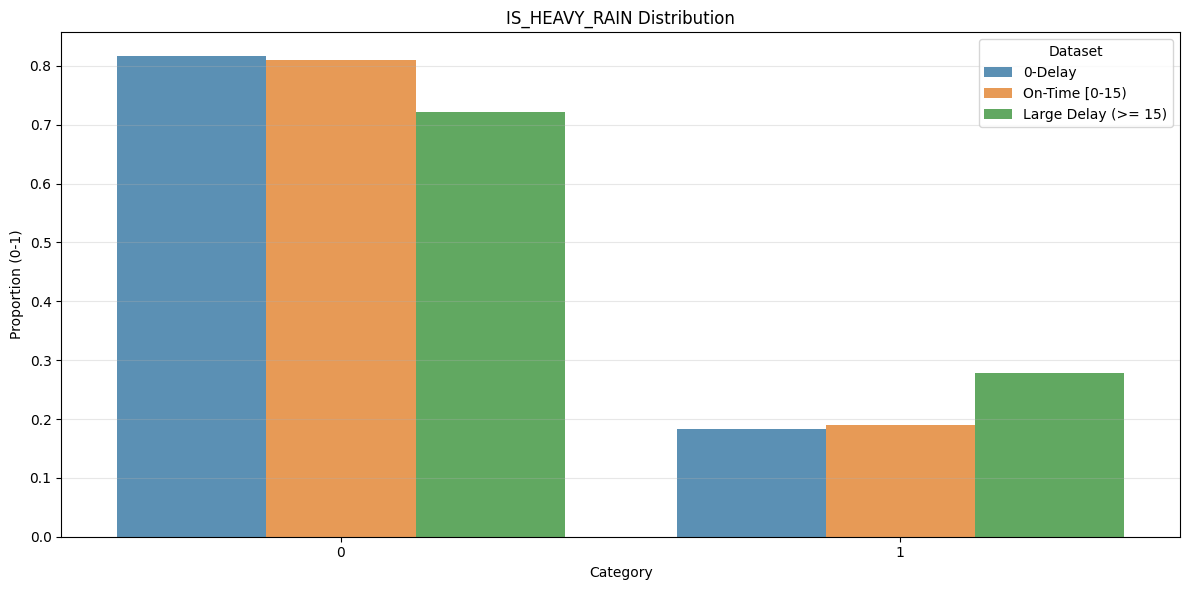

In [ ]:
col = 'IS_HEAVY_RAIN'
datasets = [zero_group[col]]
for thresh in threshold_groups:
  small_delay_group, large_delay_group = threshold_groups[thresh]
  datasets.append(small_delay_group[col])
  datasets.append(large_delay_group[col])

labels = ['0-Delay', 'On-Time [0-15)', 'Large Delay (>= 15)']
print(df[col].value_counts(normalize=True))
compare_categorical(datasets, labels, title=f"{col} Distribution")

IS_SNOWY
0    0.979881
1    0.020119
Name: proportion, dtype: float64


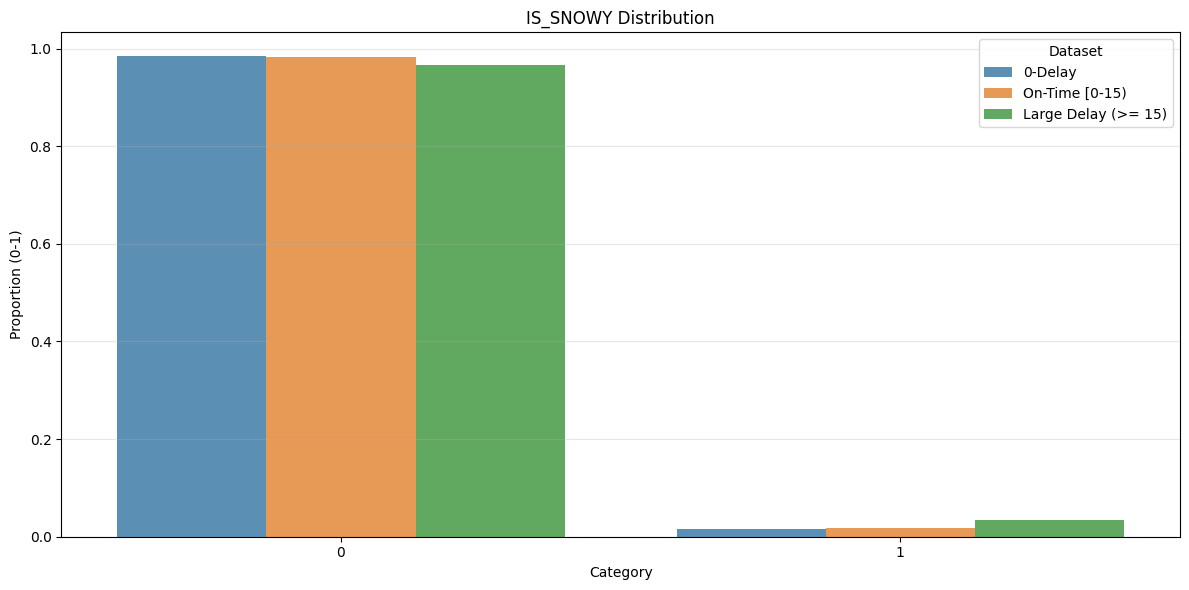

In [ ]:
col = 'IS_SNOWY'
datasets = [zero_group[col]]
for thresh in threshold_groups:
  small_delay_group, large_delay_group = threshold_groups[thresh]
  datasets.append(small_delay_group[col])
  datasets.append(large_delay_group[col])

labels = ['0-Delay', 'On-Time [0-15)', 'Large Delay (>= 15)']
print(df[col].value_counts(normalize=True))
compare_categorical(datasets, labels, title=f"{col} Distribution")

IS_FREEZING
0    0.872884
1    0.127116
Name: proportion, dtype: float64


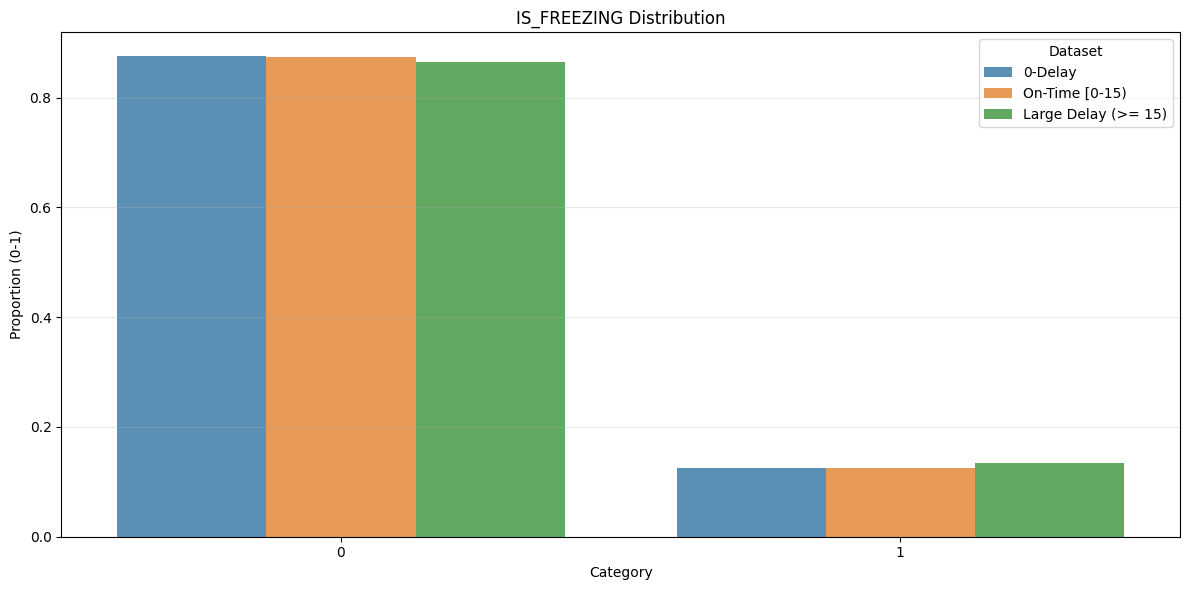

In [ ]:
col = 'IS_FREEZING'
datasets = [zero_group[col]]
for thresh in threshold_groups:
  small_delay_group, large_delay_group = threshold_groups[thresh]
  datasets.append(small_delay_group[col])
  datasets.append(large_delay_group[col])

labels = ['0-Delay', 'On-Time [0-15)', 'Large Delay (>= 15)']
print(df[col].value_counts(normalize=True))
compare_categorical(datasets, labels, title=f"{col} Distribution")

IS_EXTREME_HEAT
0    0.947644
1    0.052356
Name: proportion, dtype: float64


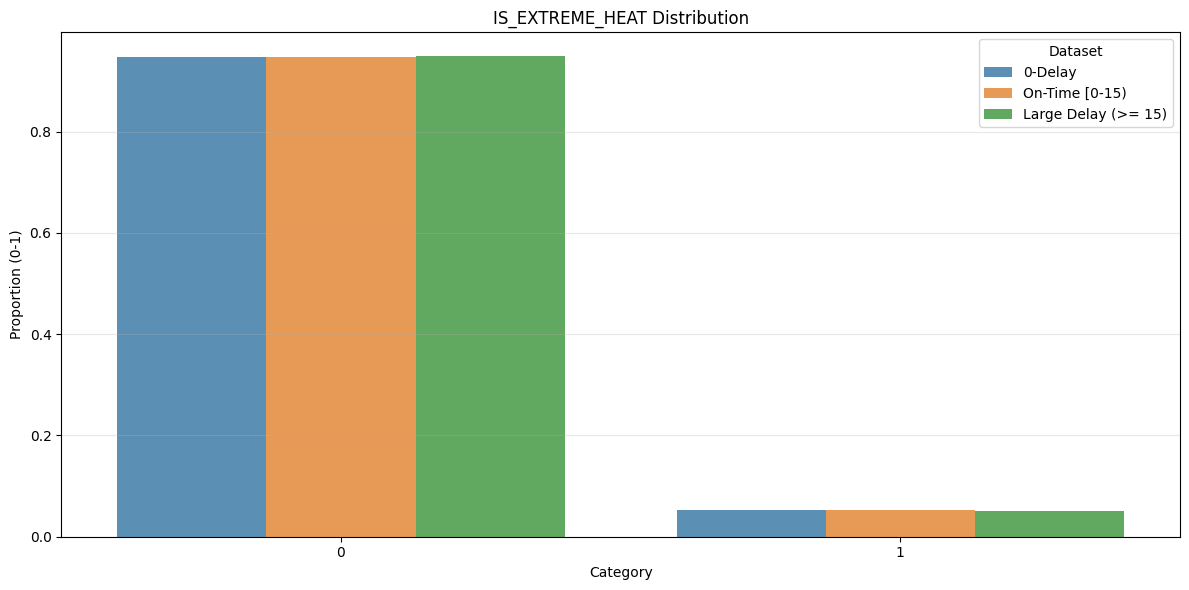

In [ ]:
col = 'IS_EXTREME_HEAT'
datasets = [zero_group[col]]
for thresh in threshold_groups:
  small_delay_group, large_delay_group = threshold_groups[thresh]
  datasets.append(small_delay_group[col])
  datasets.append(large_delay_group[col])

labels = ['0-Delay', 'On-Time [0-15)', 'Large Delay (>= 15)']
print(df[col].value_counts(normalize=True))
compare_categorical(datasets, labels, title=f"{col} Distribution")

SEASON
2    0.262537
1    0.253708
3    0.251896
0    0.231859
Name: proportion, dtype: float64


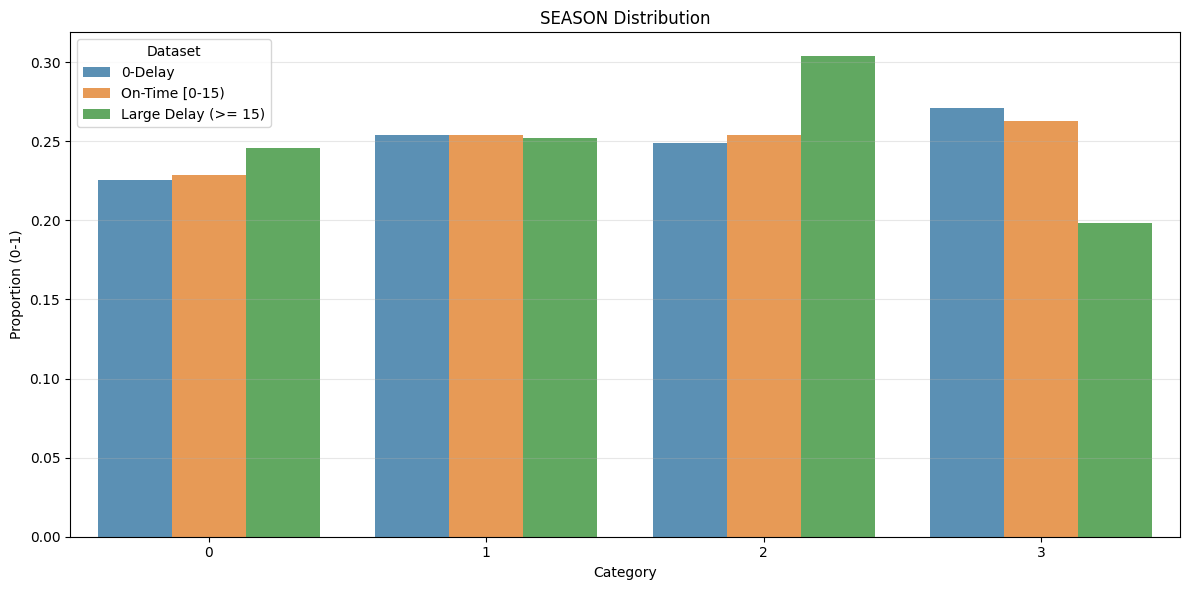

In [ ]:
# 0 = Winter
# 1 = Spring
# 2 = Summer
# 3 = Fall
col = 'SEASON'
datasets = [zero_group[col]]
for thresh in threshold_groups:
  small_delay_group, large_delay_group = threshold_groups[thresh]
  datasets.append(small_delay_group[col])
  datasets.append(large_delay_group[col])

labels = ['0-Delay', 'On-Time [0-15)', 'Large Delay (>= 15)']
print(df[col].value_counts(normalize=True))
compare_categorical(datasets, labels, title=f"{col} Distribution")

## Test different PRCP, SNOW, SNWD, TMIN, TMAX, AWND thresholds for IS_HEAVY_RAIN, IS_SNOWY, IS_FREEZING, IS_EXTREME_HEAT, IS_WINDY respectively

IS_HEAVY_RAIN
0    0.795324
1    0.204676
Name: proportion, dtype: float64


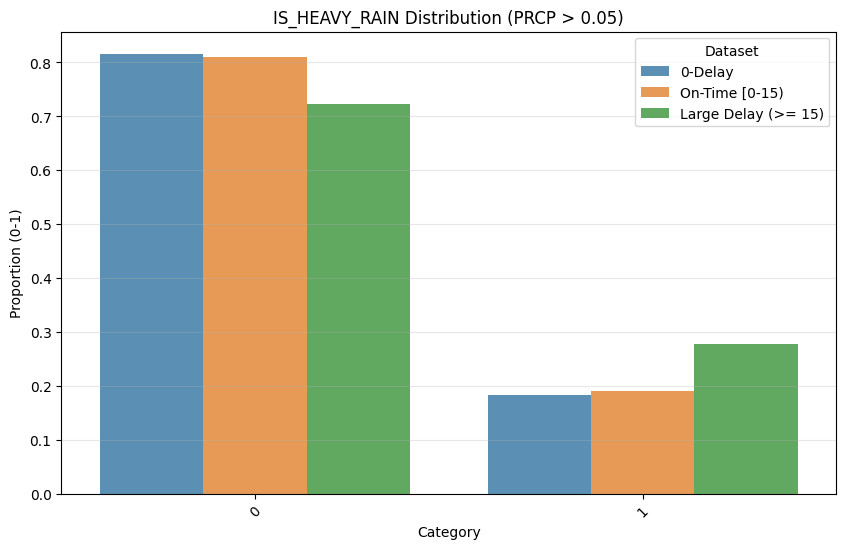

IS_HEAVY_RAIN
0    0.831146
1    0.168854
Name: proportion, dtype: float64


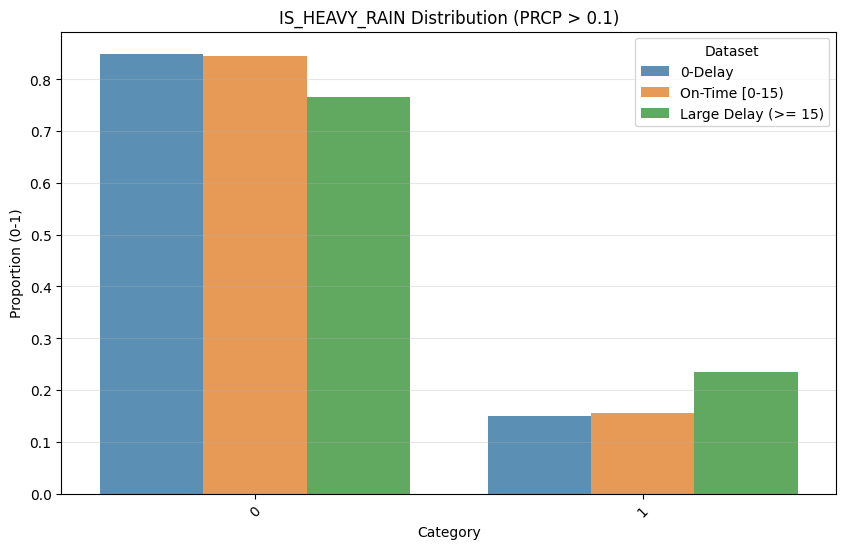

IS_HEAVY_RAIN
0    0.874512
1    0.125488
Name: proportion, dtype: float64


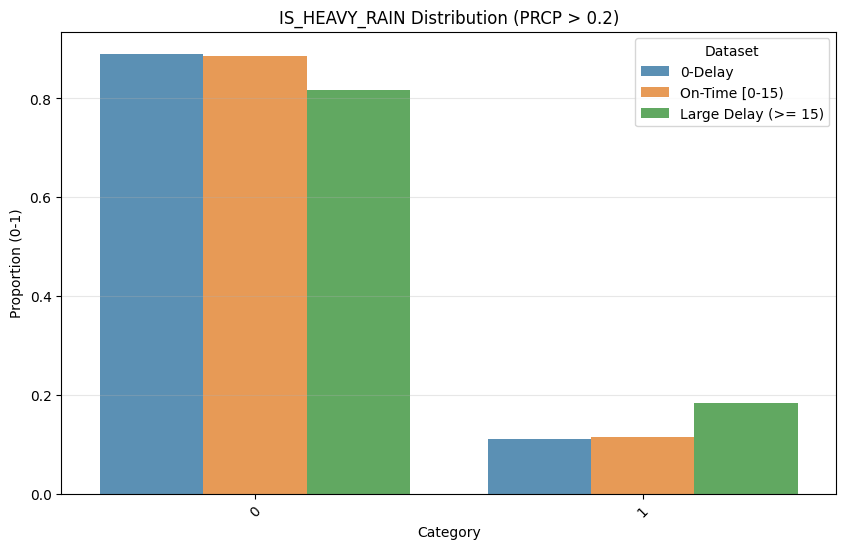

IS_HEAVY_RAIN
0    0.936551
1    0.063449
Name: proportion, dtype: float64


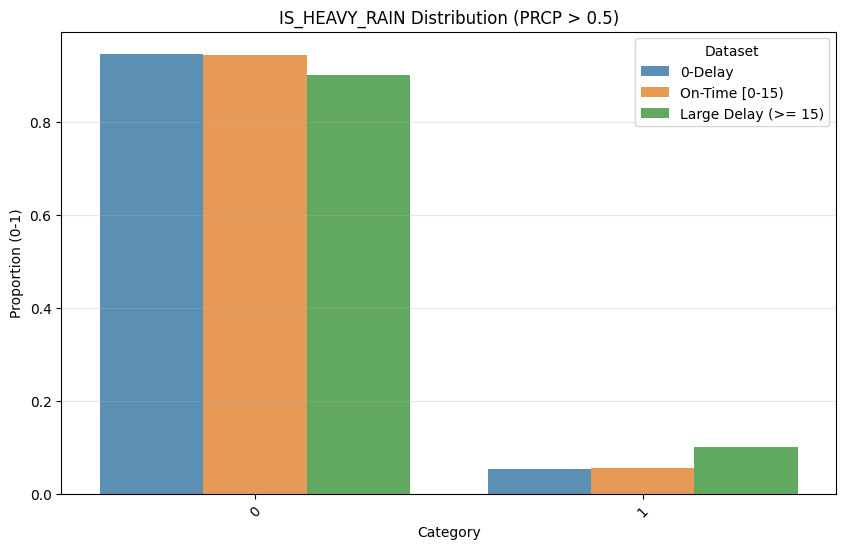

IS_HEAVY_RAIN
0    0.975601
1    0.024399
Name: proportion, dtype: float64


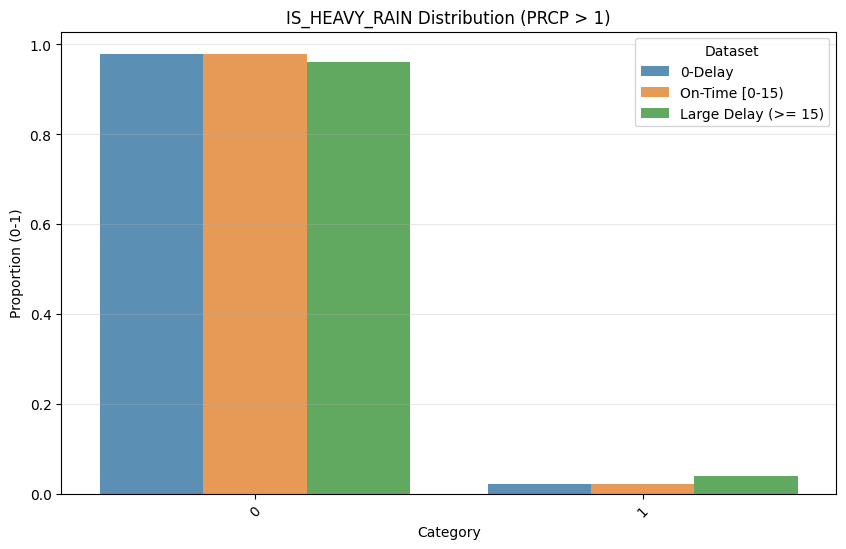

In [ ]:
col = 'PRCP'
new_col = 'IS_HEAVY_RAIN'
col_thresholds = [0.05, 0.1, 0.2, 0.5, 1]
for threshold in col_thresholds:
  df[new_col] = (df[col] > threshold).astype(int)
  print(df[new_col].value_counts(normalize=True))

  # Fix: Use .loc[index] to get the UPDATED values from df
  datasets = [df.loc[zero_group.index, new_col]]
  for thresh in threshold_groups:
    small_delay_group, large_delay_group = threshold_groups[thresh]
    datasets.append(df.loc[small_delay_group.index, new_col])
    datasets.append(df.loc[large_delay_group.index, new_col])

  labels = ['0-Delay', 'On-Time [0-15)', 'Large Delay (>= 15)']
  compare_categorical(datasets, labels, title=f"{new_col} Distribution ({col} > {threshold})")

IS_SNOWY
0    0.975607
1    0.024393
Name: proportion, dtype: float64


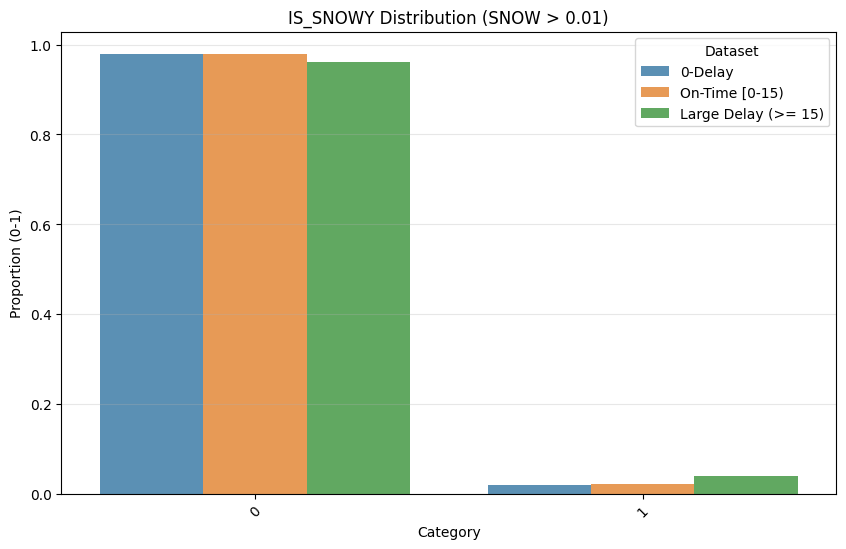

IS_SNOWY
0    0.975607
1    0.024393
Name: proportion, dtype: float64


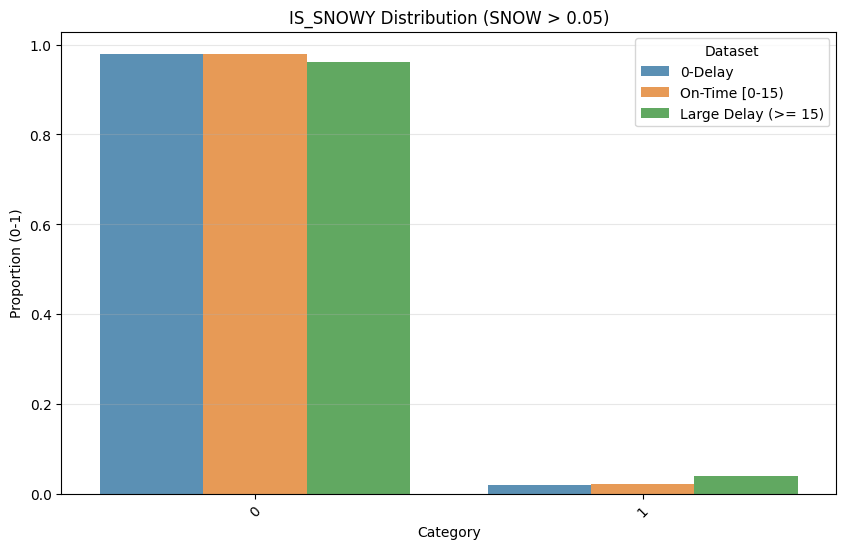

IS_SNOWY
0    0.979881
1    0.020119
Name: proportion, dtype: float64


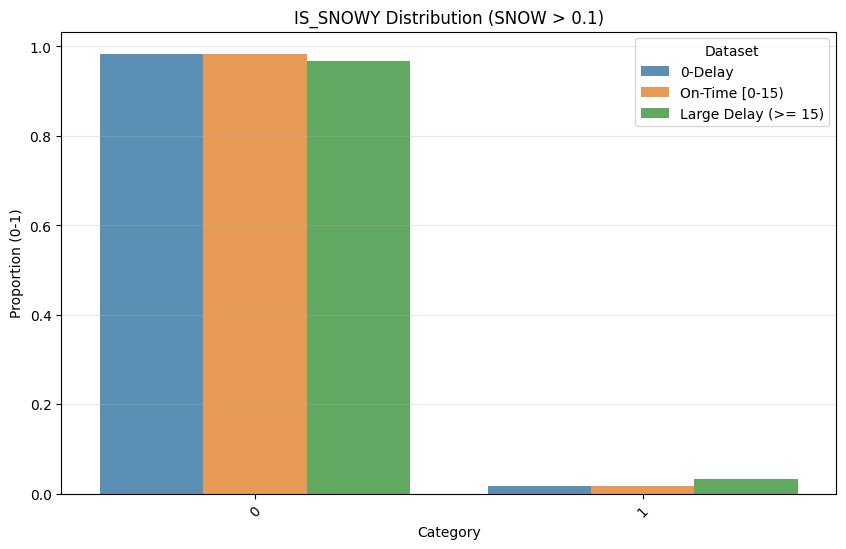

IS_SNOWY
0    0.979881
1    0.020119
Name: proportion, dtype: float64


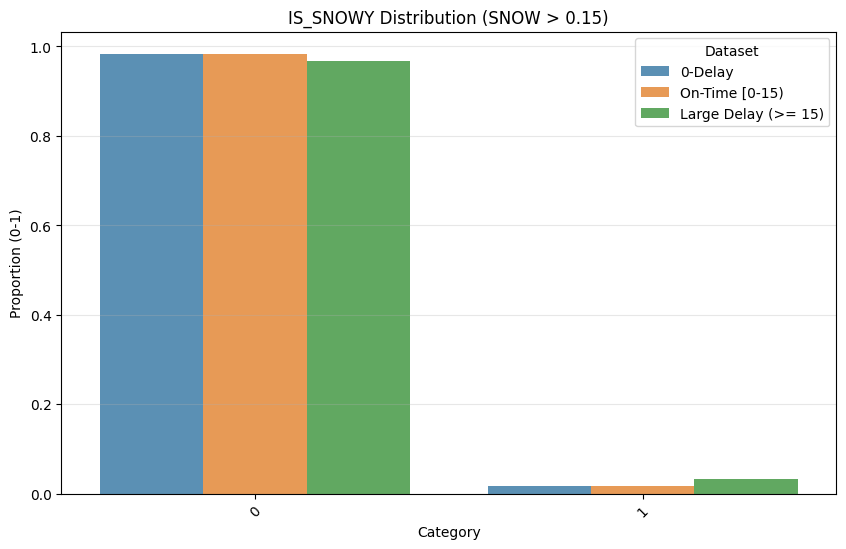

IS_SNOWY
0    0.986384
1    0.013616
Name: proportion, dtype: float64


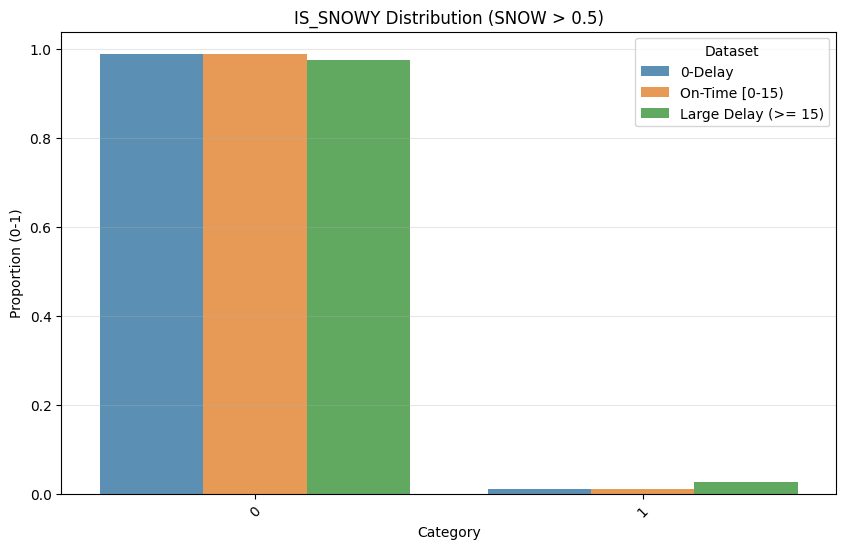

IS_SNOWY
0    0.988226
1    0.011774
Name: proportion, dtype: float64


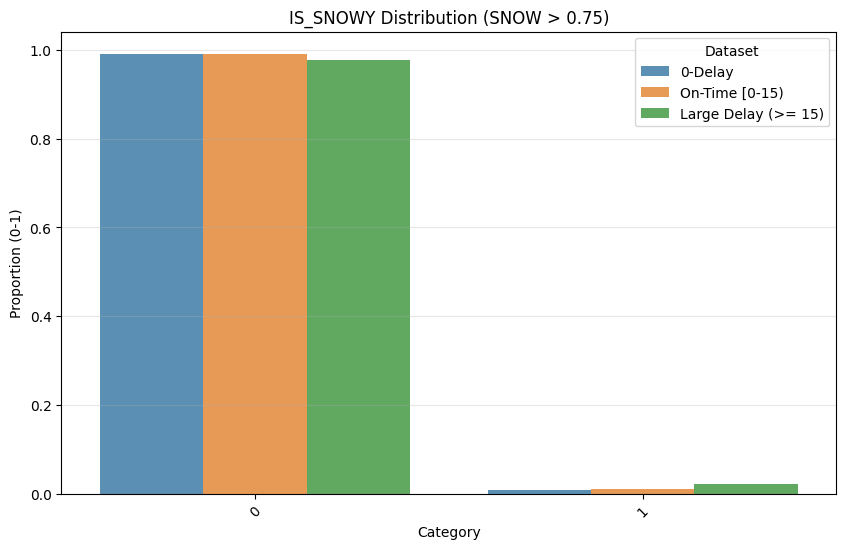

IS_SNOWY
0    0.991245
1    0.008755
Name: proportion, dtype: float64


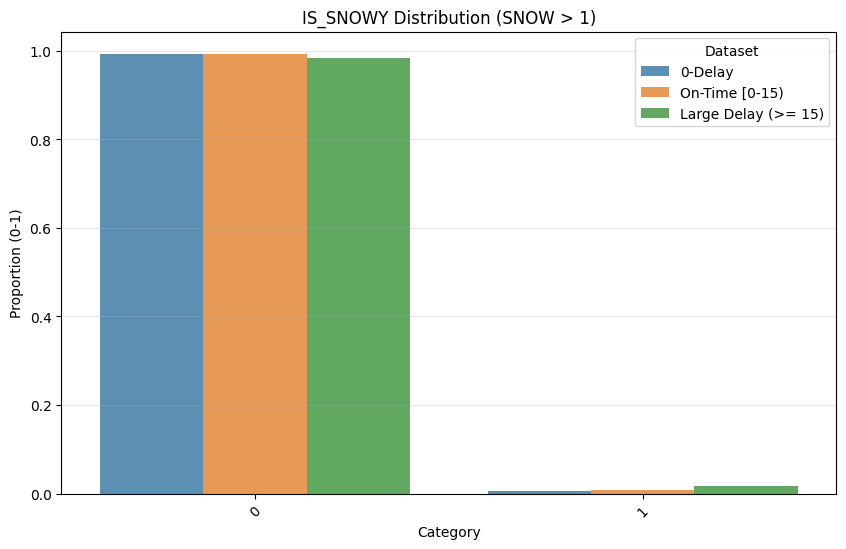

In [ ]:
col = 'SNOW'
new_col = 'IS_SNOWY'
col_thresholds = [0.01, 0.05, 0.1, 0.15, 0.5, 0.75, 1]
for threshold in col_thresholds:
  df[new_col] = (df[col] > threshold).astype(int)
  print(df[new_col].value_counts(normalize=True))

  # Fix: Use .loc[index] to get the UPDATED values from df
  datasets = [df.loc[zero_group.index, new_col]]
  for thresh in threshold_groups:
    small_delay_group, large_delay_group = threshold_groups[thresh]
    datasets.append(df.loc[small_delay_group.index, new_col])
    datasets.append(df.loc[large_delay_group.index, new_col])

  labels = ['0-Delay', 'On-Time [0-15)', 'Large Delay (>= 15)']
  compare_categorical(datasets, labels, title=f"{new_col} Distribution ({col} > {threshold})")

IS_FREEZING
0    0.968045
1    0.031955
Name: proportion, dtype: float64


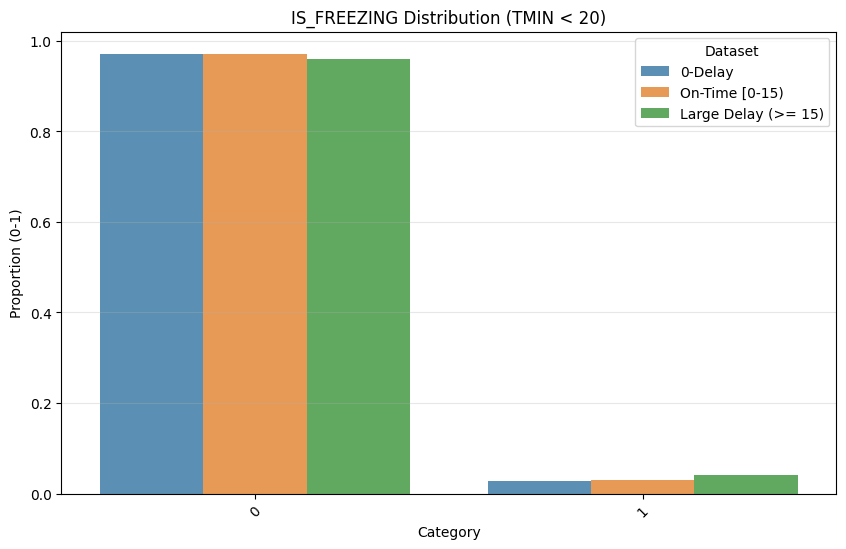

IS_FREEZING
0    0.941482
1    0.058518
Name: proportion, dtype: float64


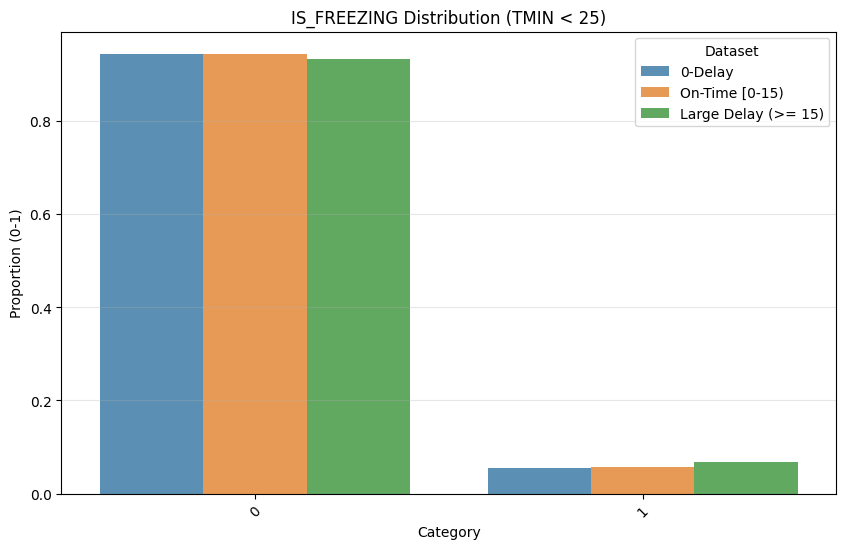

IS_FREEZING
0    0.916415
1    0.083585
Name: proportion, dtype: float64


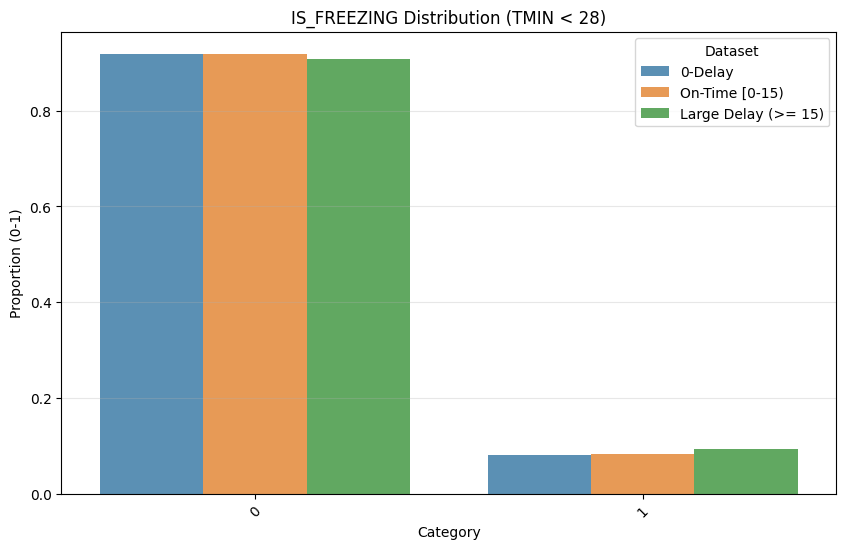

IS_FREEZING
0    0.896374
1    0.103626
Name: proportion, dtype: float64


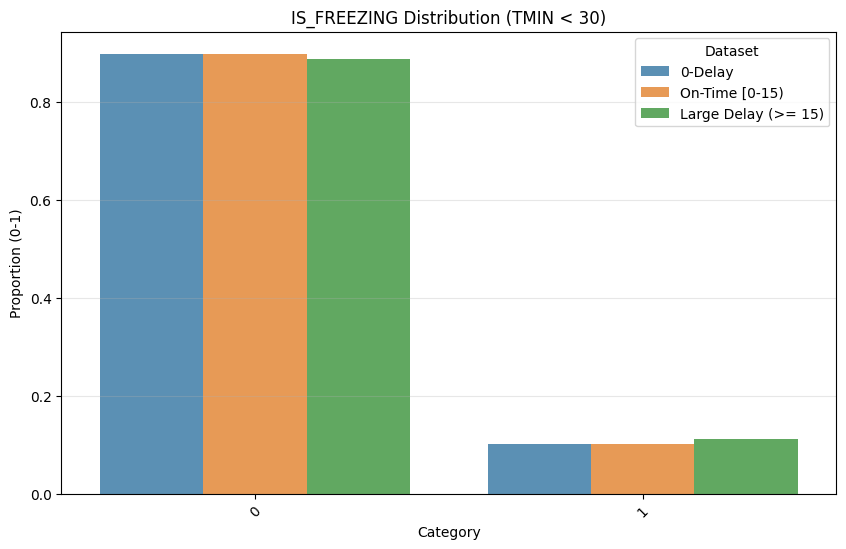

IS_FREEZING
0    0.872884
1    0.127116
Name: proportion, dtype: float64


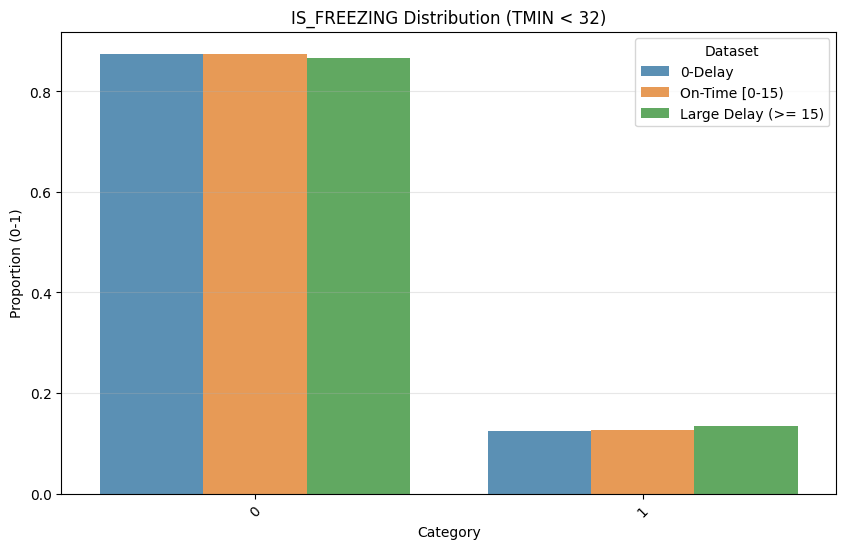

In [ ]:
col = 'TMIN'
new_col = 'IS_FREEZING'
col_thresholds = [20, 25, 28, 30, 32]
for threshold in col_thresholds:
  df[new_col] = (df[col] < threshold).astype(int)
  print(df[new_col].value_counts(normalize=True))

  # Fix: Use .loc[index] to get the UPDATED values from df
  datasets = [df.loc[zero_group.index, new_col]]
  for thresh in threshold_groups:
    small_delay_group, large_delay_group = threshold_groups[thresh]
    datasets.append(df.loc[small_delay_group.index, new_col])
    datasets.append(df.loc[large_delay_group.index, new_col])

  labels = ['0-Delay', 'On-Time [0-15)', 'Large Delay (>= 15)']
  compare_categorical(datasets, labels, title=f"{new_col} Distribution ({col} < {threshold})")

IS_EXTREME_HEAT
0    0.852168
1    0.147832
Name: proportion, dtype: float64


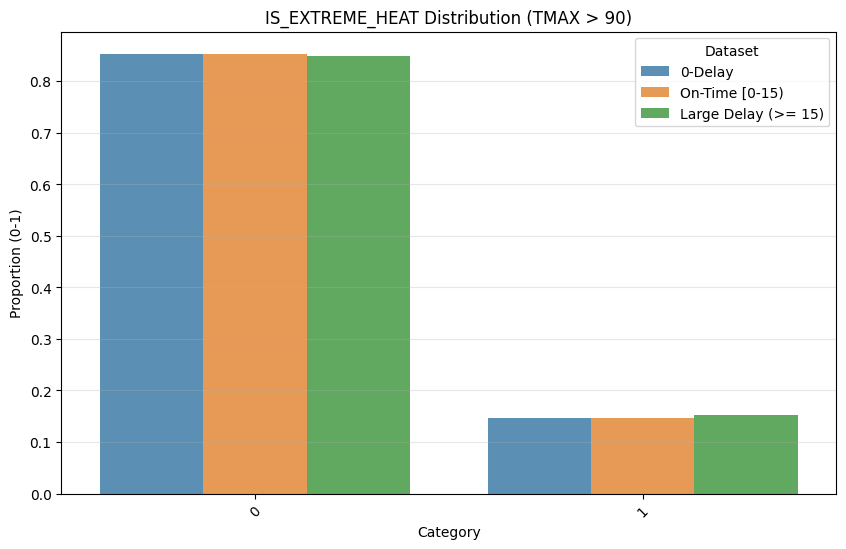

IS_EXTREME_HEAT
0    0.947644
1    0.052356
Name: proportion, dtype: float64


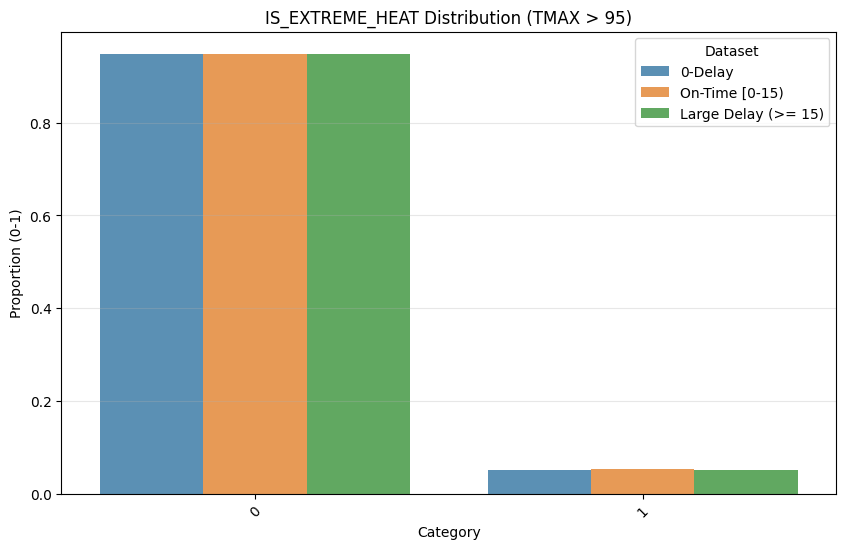

IS_EXTREME_HEAT
0    0.983533
1    0.016467
Name: proportion, dtype: float64


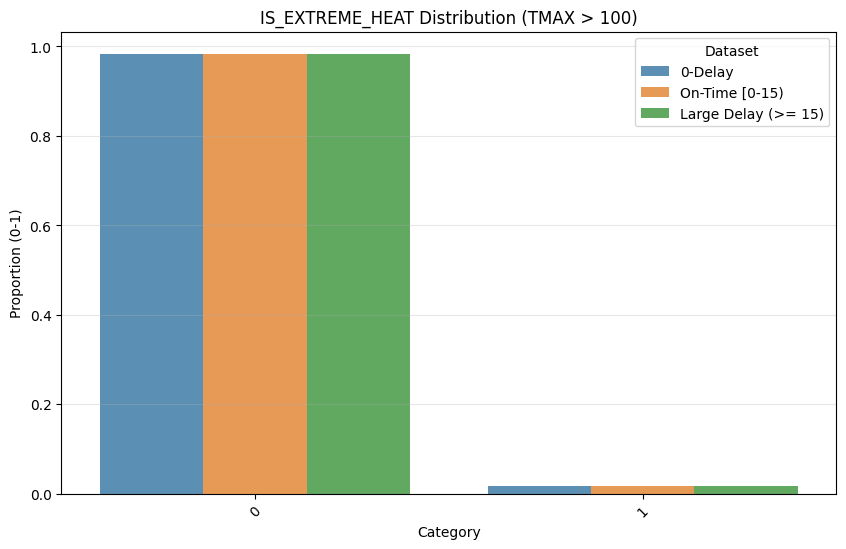

IS_EXTREME_HEAT
0    0.991919
1    0.008081
Name: proportion, dtype: float64


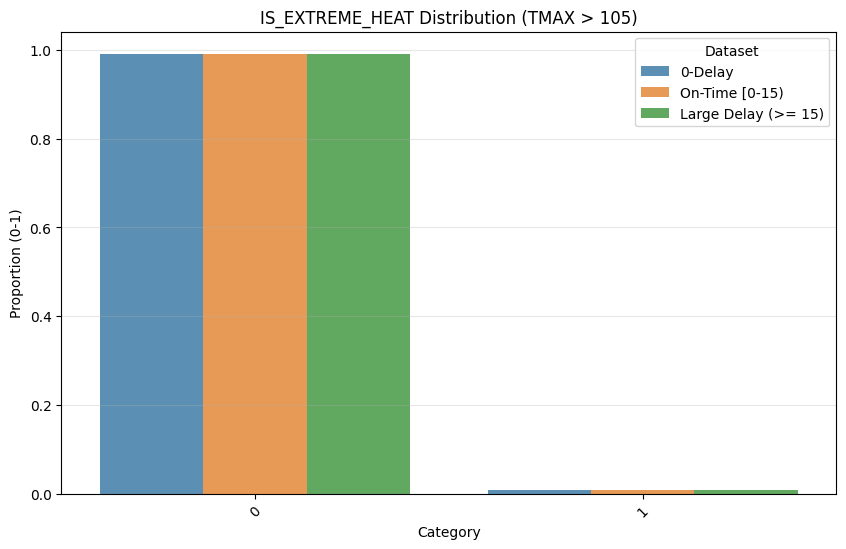

In [ ]:
col = 'TMAX'
new_col = 'IS_EXTREME_HEAT'
col_thresholds = [90, 95, 100, 105]
for threshold in col_thresholds:
  df[new_col] = (df[col] > threshold).astype(int)
  print(df[new_col].value_counts(normalize=True))

  # Fix: Use .loc[index] to get the UPDATED values from df
  datasets = [df.loc[zero_group.index, new_col]]
  for thresh in threshold_groups:
    small_delay_group, large_delay_group = threshold_groups[thresh]
    datasets.append(df.loc[small_delay_group.index, new_col])
    datasets.append(df.loc[large_delay_group.index, new_col])

  labels = ['0-Delay', 'On-Time [0-15)', 'Large Delay (>= 15)']
  compare_categorical(datasets, labels, title=f"{new_col} Distribution ({col} > {threshold})")

#### IS_WINDY

In [ ]:
df['AWND'].describe()

,AWND
count,6.357979e+06
mean,8.328364e+00
std,3.598995e+00
min,0.000000e+00
25%,5.820000e+00
50%,7.830000e+00
75%,1.029000e+01
max,3.378000e+01


IS_WINDY
1    0.825225
0    0.174775
Name: proportion, dtype: float64


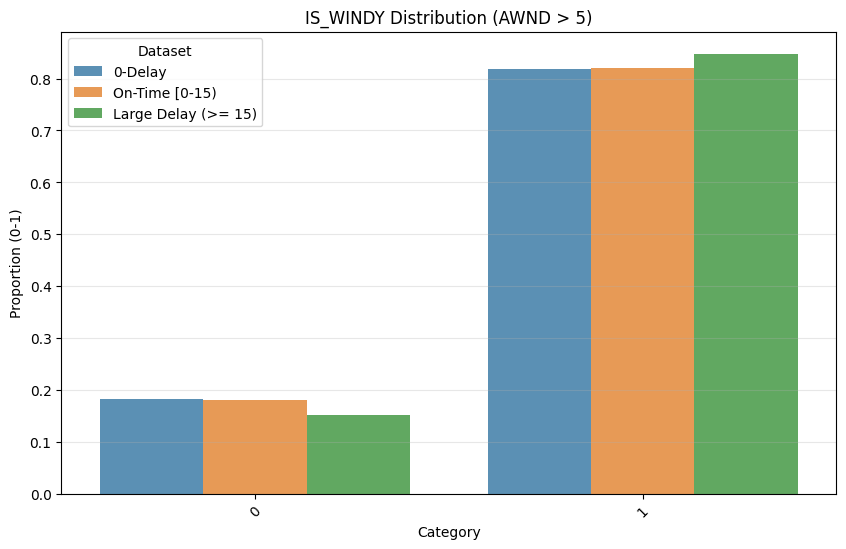

IS_WINDY
1    0.720924
0    0.279076
Name: proportion, dtype: float64


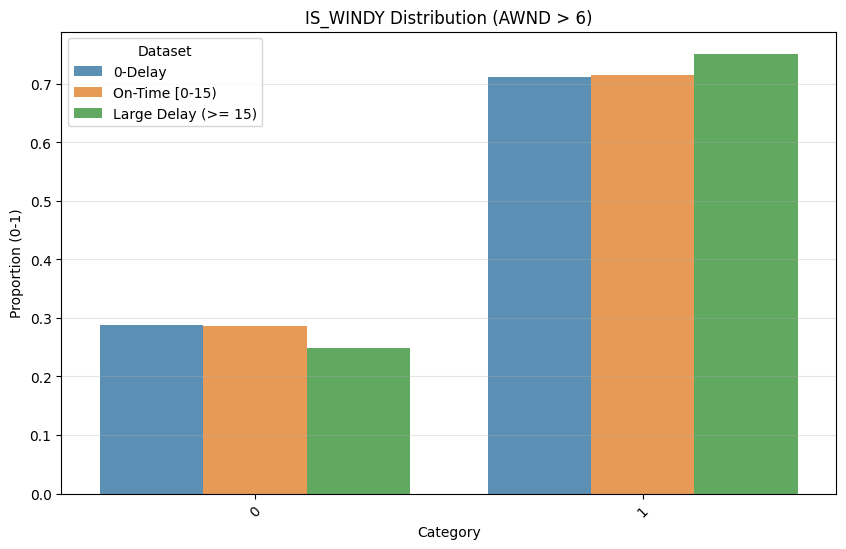

IS_WINDY
1    0.588875
0    0.411125
Name: proportion, dtype: float64


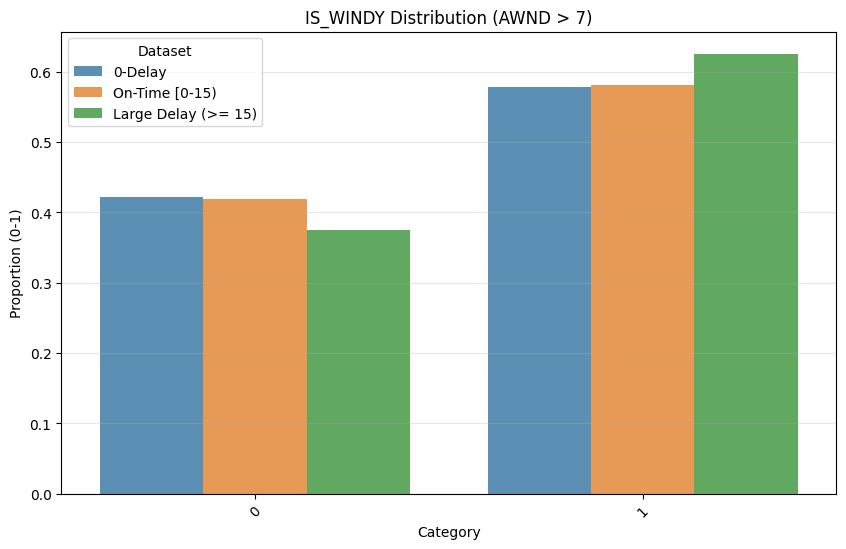

IS_WINDY
1    0.54235
0    0.45765
Name: proportion, dtype: float64


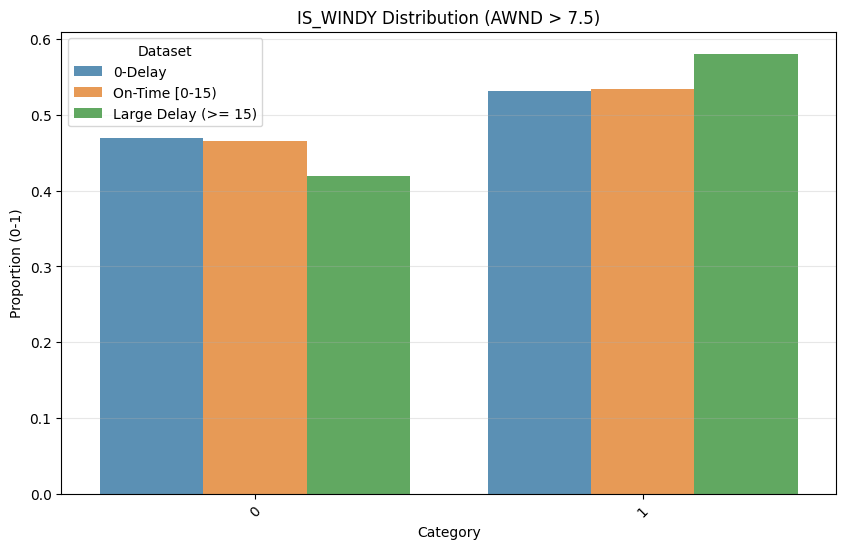

IS_WINDY
0    0.523471
1    0.476529
Name: proportion, dtype: float64


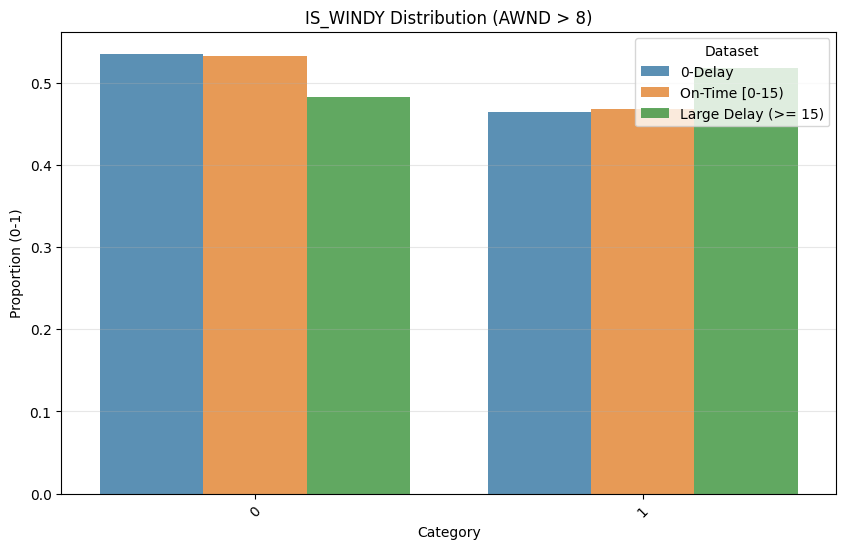

IS_WINDY
0    0.603918
1    0.396082
Name: proportion, dtype: float64


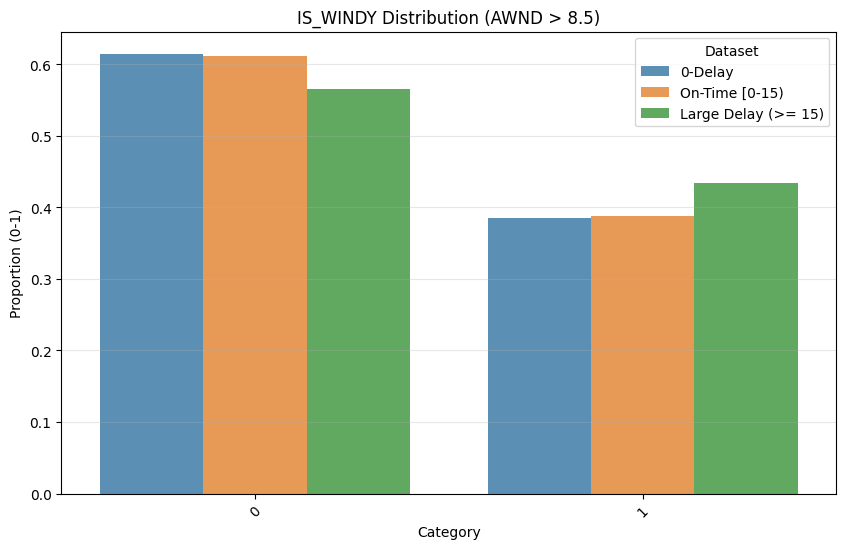

IS_WINDY
0    0.642525
1    0.357475
Name: proportion, dtype: float64


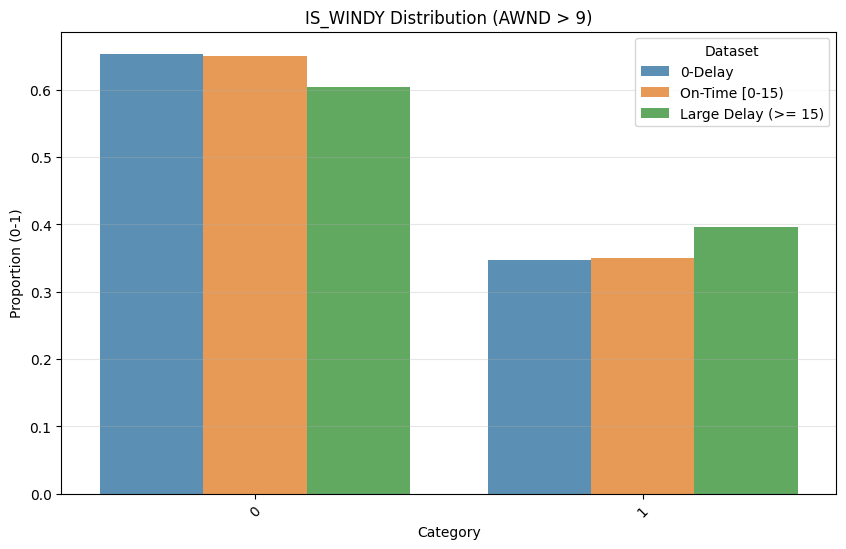

IS_WINDY
0    0.722254
1    0.277746
Name: proportion, dtype: float64


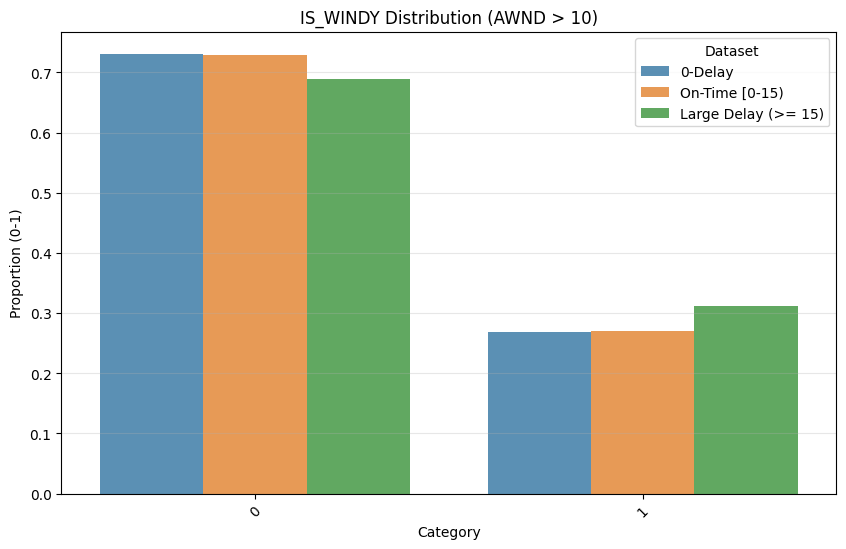

IS_WINDY
0    0.80163
1    0.19837
Name: proportion, dtype: float64


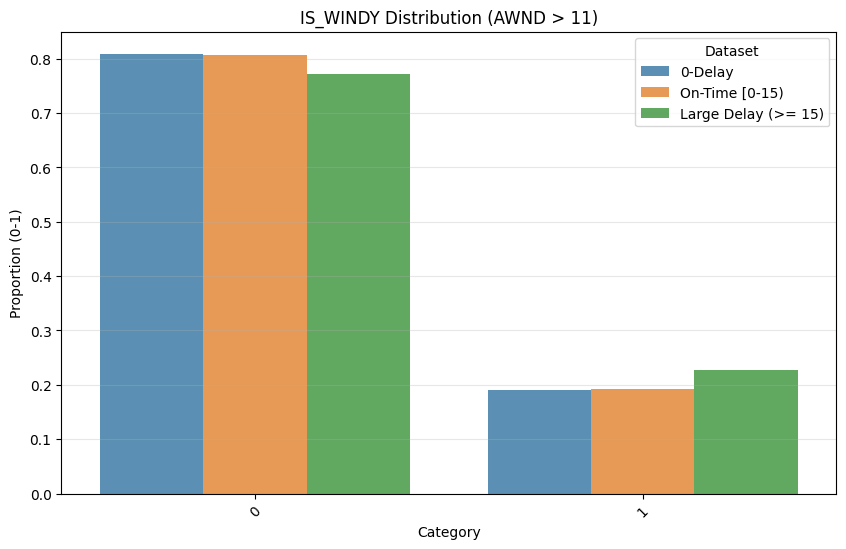

In [ ]:
col = 'AWND'
new_col = 'IS_WINDY'
col_thresholds = [5, 6, 7, 7.5, 8, 8.5, 9, 10, 11]
for threshold in col_thresholds:
  df[new_col] = (df[col] > threshold).astype(int)
  print(df[new_col].value_counts(normalize=True))

  # Fix: Use .loc[index] to get the UPDATED values from df
  datasets = [df.loc[zero_group.index, new_col]]
  for thresh in threshold_groups:
    small_delay_group, large_delay_group = threshold_groups[thresh]
    datasets.append(df.loc[small_delay_group.index, new_col])
    datasets.append(df.loc[large_delay_group.index, new_col])

  labels = ['0-Delay', 'On-Time [0-15)', 'Large Delay (>= 15)']
  compare_categorical(datasets, labels, title=f"{new_col} Distribution ({col} > {threshold})")

#### Test IS_ICING

IS_ICING
0    0.981168
1    0.018832
Name: proportion, dtype: float64


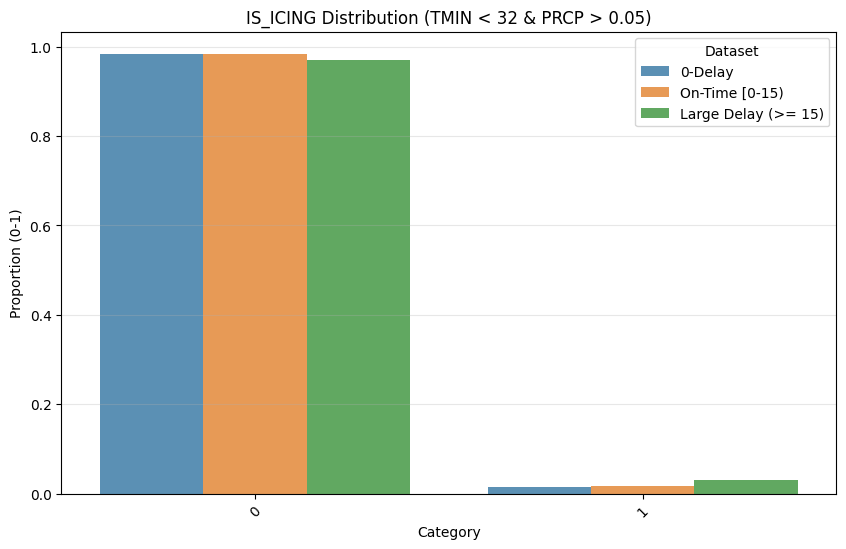

IS_ICING
0    0.985745
1    0.014255
Name: proportion, dtype: float64


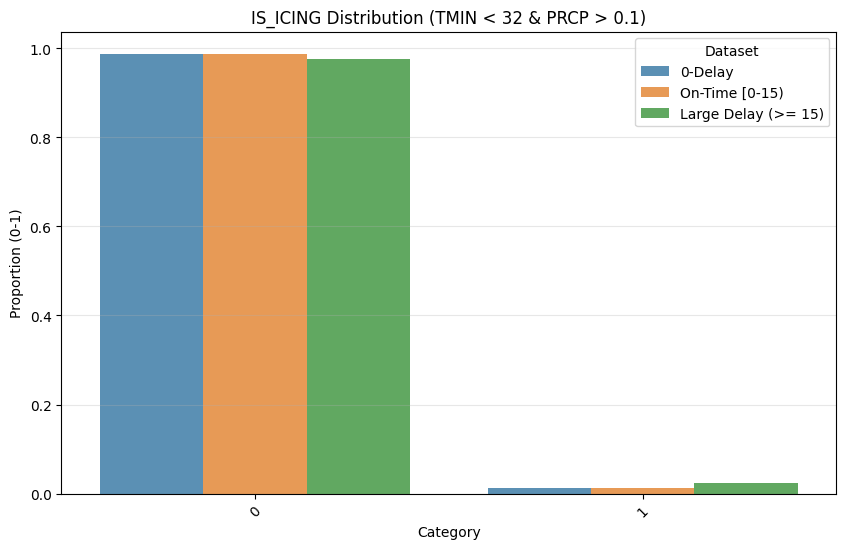

IS_ICING
0    0.991325
1    0.008675
Name: proportion, dtype: float64


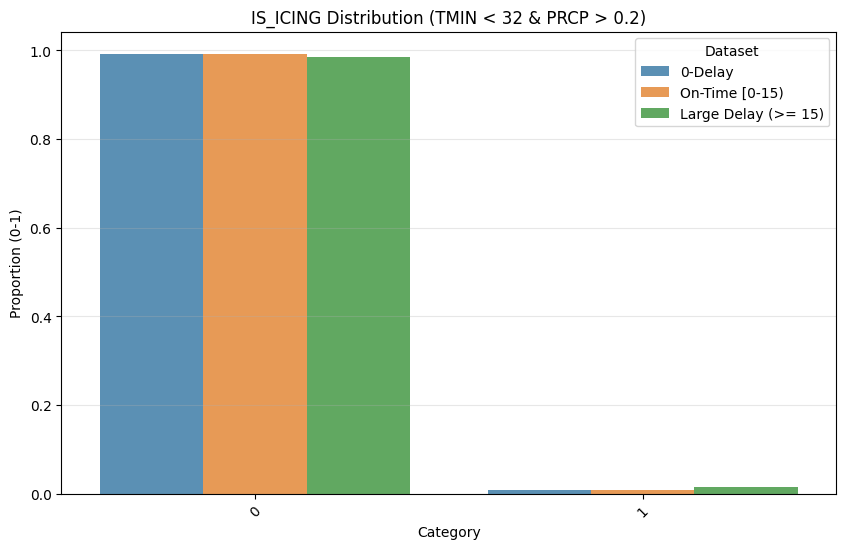

IS_ICING
0    0.996534
1    0.003466
Name: proportion, dtype: float64


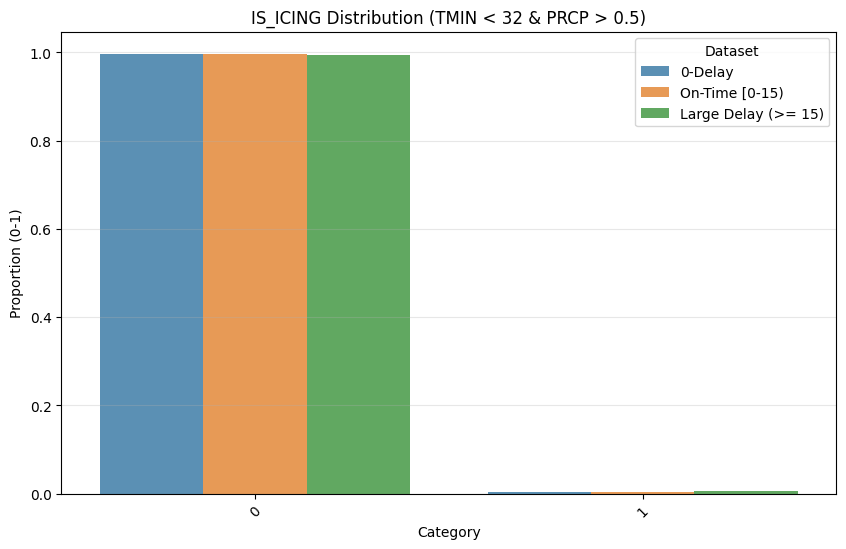

IS_ICING
0    0.999624
1    0.000376
Name: proportion, dtype: float64


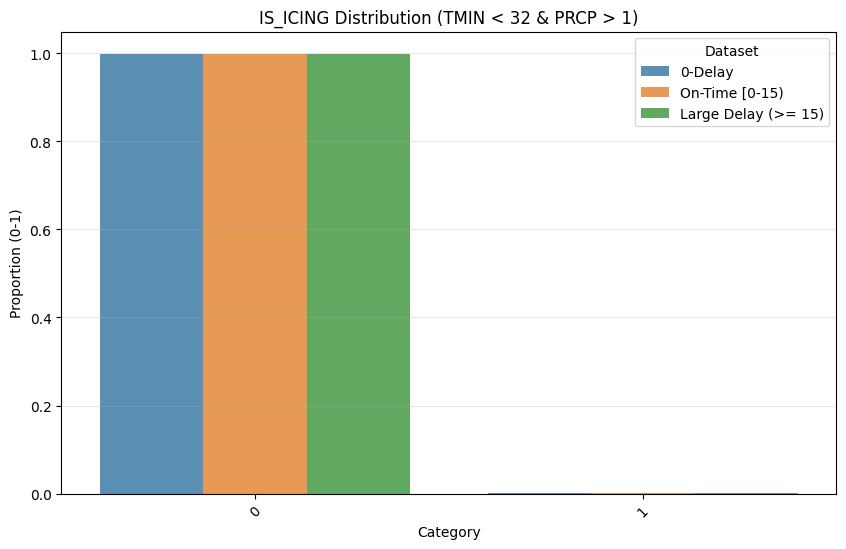

In [ ]:
col = 'PRCP'
new_col = 'IS_ICING'
col_thresholds = [0.05, 0.1, 0.2, 0.5, 1]

for threshold in col_thresholds:
  # Correct Logic: Icing = Freezing (< 32F) AND Precipitation (> threshold)
  df[new_col] = ((df['TMIN'] < 32) & (df['PRCP'] > threshold)).astype(int)
  print(df[new_col].value_counts(normalize=True))

  # Fix: Use .loc[index] to get the UPDATED values from df
  datasets = [df.loc[zero_group.index, new_col]]
  for thresh in threshold_groups:
    small_delay_group, large_delay_group = threshold_groups[thresh]
    datasets.append(df.loc[small_delay_group.index, new_col])
    datasets.append(df.loc[large_delay_group.index, new_col])

  labels = ['0-Delay', 'On-Time [0-15)', 'Large Delay (>= 15)']
  compare_categorical(datasets, labels, title=f"{new_col} Distribution (TMIN < 32 & PRCP > {threshold})")

# Train-Test Split - NOW DONE IN DATASET_CLEANUP NOTEBOOK

In [ ]:
# from typing import List, Tuple, Dict

# # --- FUNCTION: Stratified Train/Test Split ---

# def split_subsample(X_sub: pd.DataFrame,
#                     y_sub: pd.DataFrame,
#                     test_ratio: float = 0.2,
#                     stratify_column: str = 'DEP_DEL15',
#                     random_state: int = 42) -> Tuple[pd.DataFrame, pd.DataFrame, pd.DataFrame, pd.DataFrame]:
#     """
#     Splits a single subsample into stratified train and test sets.
#     """
#     X_train, X_test, y_train, y_test = train_test_split(
#         X_sub,
#         y_sub,
#         test_size=test_ratio,
#         stratify=y_sub[stratify_column],
#         random_state=random_state
#     )
#     return X_train, X_test, y_train, y_test

In [ ]:
# # Ensure delay_flag column is present before splitting if it was temporary for sampling
# if delay_flag not in df.columns:
#     df[delay_flag] = (df['DEP_DELAY_NEW'] > 0).astype(int)

# # Define features (X) and target (y)
# # X will contain all columns except 'DEP_DELAY_NEW' and delay_flag
# # y will be the delay_flag column for stratification and binary classification

# X = df.drop(columns=['DEP_DELAY_NEW', delay_flag])
# y = df[['DEP_DELAY_NEW', delay_flag]]

In [ ]:
# X.head(5)

,MONTH,DAY_OF_WEEK,DEP_TIME,DEP_TIME_BLK,DISTANCE_GROUP,DEP_HOUR,SEGMENT_NUMBER,CONCURRENT_FLIGHTS,NUMBER_OF_SEATS,CARRIER_NAME,...,WT10,WT11,AWND_missing,TMIN_missing,TMAX_missing,IS_HEAVY_RAIN,IS_SNOWY,IS_FREEZING,IS_EXTREME_HEAT,SEASON
0,1,3,1652.0,1600-1659,7,16.0,1,25,154,United Air Lines Inc.,...,0.0,0.0,0,0,0,1,1,1,0,0
1,1,3,822.0,0800-0859,10,8.0,1,34,154,United Air Lines Inc.,...,0.0,0.0,0,0,0,0,0,1,0,0
2,1,3,644.0,0600-0659,4,6.0,1,16,154,United Air Lines Inc.,...,0.0,0.0,0,0,0,0,0,1,0,0
4,1,3,556.0,0600-0659,3,5.0,1,11,180,Delta Air Lines Inc.,...,0.0,0.0,0,0,0,0,0,1,0,0
5,1,3,607.0,0600-0659,2,6.0,1,30,110,Delta Air Lines Inc.,...,0.0,0.0,0,0,0,0,0,0,0,0


In [ ]:
# y.head(5)

,DEP_DELAY_NEW,DEP_DEL15
0,0,0
1,0,0
2,44,1
4,0,0
5,0,0
